# University of Edinburgh - Undergraduate Research Assistantship under Dr. Tiancheng Sun

## _"The Turtle Strategy: The Trend is Your Friend"_  by Nicholas Roy and Yihuan Li

__Abstract:__ _In 1983, Richard Dennis, a successful commodity trader based in Chicago, made a bet with his friend and fellow trader, William Eckhardt, that  anyone could be taught how to trade profitably. Together, they began teaching a basket of trading strategies to a group of two dozen traders who became known as the "Turtles", in reference to farm-grown turtles Dennis witnessed while traveling abroad. These strategies, ranging from simple trend-following to risk-adaptive position sizing and aggressive pyramiding would constitute their "Turtle Trading System". In this project, we emulate and simulate the Turtle Trading System with Geometric Brownian Motion (GBM) to gain a deeper understanding of its behaviour and performance in the context of various price paths and system parameters. We then introduce time-varying conditional volatility— obtained by fitting a GARCH(1,1) model to historical S&P 500 log returns —into the GBM path calculation, and comment briefly on the influence of such time-varying percentage volatility and volatility clustering on the overall system. We conclude by modifying several original Turtle rules to improve its risk-reward profile in our simulated GBM + GARCH price environment._

## I. Turtle Trading System: Baseline Rules

The central focus focus on this project is the development of a computational framework for simulating and stress-testing trading systems, such as the Turtle Trading System, using synthetic prices modeled by Geometric Brownian Motion. Along the way, we hope to provide a brief discussion on the most influential parameters and strategies within the system, as indicated by our simulation results, and to share our insights into some of the potential drivers of these influences. We do not seek to maximize the computational efficiency of the modelling framework or optimize the Turtle Trading System for use in real asset markets, but to simply shed some light on its inclinations and temperament as a trading system through repeated simulation. 

Before exploring the deterministic and stochastic drivers of the original Turtle Trading System, we first need to define the rules and strategies that comprise it. Though there exists some discrepancy regarding the precise characteristics of the original Turtle Trading System, a general consensus seems to have fallen on the following baseline rules:

1. __Entry/Exit:__
    - In the case of long positions, entries are marked by price breakouts from the upper 20-period Donchian channel (the moving maximum of the past 20-periods). Exits are marked by price breakouts from the lower 10-period Donchian channel (the moving minimum of the past 10-periods).$ ^{1} $
    - Similarly, in the case of short positions, entries are marked by price breakouts from the lower 20-period DC, and exits from the upper 10-period DC.
    - Because the exit breakout period is shorter than the entry period, exits are more reactive than entries. The threshold for entry is often more demanding, as seen in the case of positive variance and negligable drift, where the maximum/minimum of the previous 20 periods is typically greater than the previous 10 periods.

2. __Risk-Adaptive Position Sizing:__

    - The size of a position depends on the amount or "unit" of risk posed to the total account balance, in monetary units. Intuitively, a unit represents a portion of the account balance with we enter a position and the size of the unit decreases when risk to the account is high.$^{1}$
<br />
<br />
        $$ Unit = \frac{1\% \, \text{of account}}{\text{Market Dollar Volatility}} = \frac{1\% \, \text{of account}}{\text{ATR} * \text{Dollars Per Point}}$$
<br />
    -  In other words, units are sized so that the ATR represents 1% of account equity. "ATR" or "Average True Range," is defined as the 20-period Exponential Moving Average (EMA) of the "True Range" (TR). TR is defined as:$^{2}$
<br />
<br />
$$ TR = \max[(\text{high}-\text{low}), |\text{high}-\text{close}_{\text{prev}}|, |\text{low}-\text{close}_{\text{prev}}|] $$
<br />  
    - Where the $high, low, close$ are of the current trading period. Therefore, the resulting ATR acts as a measure of absolute inter-and-intra period volatility.
    - "Dollars Per Point," also known as the "Big Point Value," is the dollar value represented by a full point of price movement. In this context, it can be seen as the size of the underlying contract to be traded. In the case of simple equity shares, this is typically 1:1-- i.e., one receives \\$1 of equity for \\$1 of purchase.$^{3}$
    - In the case of non-fractional equity shares, the position size, in terms of number of shares, is equivalent to the integer quotient of the unit divided by the price per share. In other words, we buy as many shares as we can evenly fit into a unit. 
<br />   
<br />   
    $$ \text{Number of Shares Bought or Sold} = \text{Integer}\left[\frac{\text{Unit}}{\text{Price Per Share}}\right] $$
<br />   
    - Ongoing positions can be incremented via "pyramiding". We add units to an active position when the price breaks out of 1/2 $\times$ initial ATR of the original entry point. The size of these additional units are also incremented by 1/2 $\times$ initial ATR, such that:
<br />
<br />
$$ \text{unit}_{2} = \text{unit}_{1} + \frac{1}{2} \times \text{ATR}_{1}; \quad \text{unit}_{3} = \text{unit}_{2} + \frac{1}{2} \times \text{ATR}_1; \quad \text{unit}_{4} = \text{unit}_{3} + \frac{1}{2} \times \text{ATR}_{1}. $$
<br />
    - A maximum of 4 units are allowed in any active position, so only up to 3 units can be pyramided.

3. __Additional Risk Management: Stop-Loss Orders__
    - In the case of long entries, sell stop-loss orders are placed at 2 $\times$ ATR below the entry price. The position is automatically closed when the price falls bellow the sell stop-loss. 
    - Similarly, in the case of short entries, buy stop-loss orders are placed at 2 $\times$ ATR above the entry price.
    - Since units are sized such that ATR represents 1% of account equity, at most 2% of risk would be allowed for a given trade.$^{1}$
    - In the case of pyramiding, the stop-loss for all units moves in tandem with the incremented position: 1/2 $\times$ initial ATR upwards in the case of long positions, downwards in the case of short positions. As a result, the latest unit is never more than 2 $\times$ ATR away from a stop-loss.

__Beyond these baseline rules,__ the Turtle Trading System appears in two primary forms: "System 1" and "System 2". These systems diverge primarily in the period of their entry and exit breakout channels, but also in their selectiveness of breakout signals for triggering entry.

1. __System 1: Short-Term Breakouts__
    - In addition to the baseline rules, breakout entry signals are ignored if the last breakout would have resulted in a winning trade, regardless of direction of previous trade (i.e., long or short) or whether that last breakout triggered a real entry. 
    - A breakout triggeres a real entry only if the previous breakout resulted in a loss or if the previous breakout is not yet classified as winning or losing breakout, as is the case in the first breakout of the simulation. This strategy originates from a belief in mean-reversion; namely, that two large, consecutive wins are less likely, or that a profitable trade is more likely to follow a losing trade.$^4$
    - "Failsafe breakout points" at the upper/lower 55-period Donchian channels trigger entry regardless of whether the previous breakout would have resulted in a winning or losing trade. This is done in the hopes of capturing large or longer-lasting trends.$^{1}$
    - There are several details regarding this previous classification system that are not made explicit in the original turtle rules. For example, does the profitability of previous breakouts consider pyramided positions even if those breakouts were artificial? For consistency, we assume that the profitability of a previous breakout includes pyramiding. We also assume that the purchasing and selling prices of these artifical trades do include any slippage or transaction costs, which are realized only in a real transaction.

2. __System 2: Long-Term Breakouts__
    - In System 2, nearly all of the baseline rules hold, except entry occurs at the breakout out of a 55-period Donchian channel, rather than a 20-period one, regardless of whether the previous breakout point resulted in a winning or losing trade.$^{1}$
    - Similarly, in the case of exit, the 10-period Donchian channel is replaced with the 20-period Donchian channel.

**It is important to note,** that in either system, it is not possible to have long and short positions open at the same time, as triggering the breakout for one position's entry would inevitably prompt the other's closure. For simplicity, we assume that it is also not possible to have multiple long or short positions active concurrently, although these scenarios are common when equity is distributed across several simultaneous instances of the Turtle Trading System. Throughout Dennis' and Erckhardt's turtle experiments, the allocation of equity across systems was frequently a matter of experimentation: ocassionally, equity was split 50-50 across each system or across several systems trading in a diverse range of asset markets.$^{1}$

## II. Simulating the Turtle Trading System  with Geometric Brownian Motion (GBM)

With these rules in mind, we now simulate both System 1 and System 2 using synthetic prices modeled by Geometric Brownian Motion (GBM). Modelling prices with GBM grants us freedom to control the percentage drift and percentage volatility of the price path in repeated Monte Carlo simulations. In contrast to backtesting with historical prices, using synthetic prices also sterilizes the price data of the price movements generated by trend-following strategies acting on similar or reverse price signals.$^5$ Nonetheless, we will sacrifice some of this control in Section III. and IV., where we introduce time-varying conditional volatility from a GARCH(1,1) model.

 In all forthcoming simulations, we will proxy stochastic slippage/transaction costs by assuming that the purchasing or selling price in a given transaction is the least favourable price from a sample of predefined number of future prices. For example, entering a long position with a slippage period of 5 commits us to buying at the highest price of the following 5 time periods. This additional cost to the position is not known at the time of the trading decision and embodies similar statistical properties as the generated path. In periods of high volatility, perhaps reflecting greater volume or market activity, slippage costs may increase for a given slippage period. We also include the possibility of a flat transaction fee, although its influence becomes negligable when the account balance is substantial, which is often required by risk-adaptive position sizing in periods of high absolute volatility. When the account balance is too low, breakouts in highly volatile regions of a price path may be ignored if the size of the unit is smaller than the price of a single, non-fractional share.

In terms of cash accounting, we assume that the account balance solely symbolizes cash, excluding the real-time market value of any owned shares. Consequently, purchasing shares results in temporary account balance drawdowns until they are sold back for cash. This method has the advantage of making the risk of a long position more explicit, while also acknowledging that non-cash assets, such as shares owned, may not be fully liquid (and therefore, should not contribute to additional risk exposure during a pyramiding transaction). For short positions, where the trader operates on margin— that is, borrows, sells, and subsequently repurchases shares to close the position —we assume that the account balance does not inflate with the initial revenue of the margin sell, consistent with margin restrictions placed on the account to ensure lender repayment. At the end of the simulation, any active positions are automatically closed with the final price in order to reflect the final cash return to the account.

### II. i. System 1 with GBM Prices

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.random.seed(42)

In [2]:
# Define System 1 (GBM) Simulation Object

class sim_system1():
    def __init__(self):
        # Path attributes
        self.path_params = None
        self.path = None
        self.open = None
        self.close = None
        self.high = None
        self.low = None
        
        # Account attributes
        self.account_evolution = None
        self.profit = None
        self.num_trans = 0

    def sim_stochastic(self, path_params, plot=True):
        ''' Generate synthetic prices using Geometric Brownian Motion (GBM) '''
        mu, sigma, S0, n, prices_per_n = path_params
        
        T = n / 252                  # Trading period in terms of years
        dt = T / (prices_per_n*n)    # Multiply number of price points to generate Open, High, Low, and Close
        t = np.linspace(0, T, n)
        self.path_params = mu, sigma, S0, n, prices_per_n, t 
        
        # Generate GBM prices
        St = np.exp(
            (mu - sigma**2/2)*dt
            + sigma * np.random.normal(0, np.sqrt(dt), size=(prices_per_n*n)))
        St = S0*St.cumprod()
        
        self.path = St
        self.open = St[0::prices_per_n]
        self.close = St[prices_per_n-1::prices_per_n]
        St_reshaped = St.reshape(-1, prices_per_n)
        self.high = np.max(St_reshaped, axis=1)
        self.low = np.min(St_reshaped, axis=1)

        if plot==True:
            plt.plot(t, self.close)
            plt.xlabel("Time (years)")
            plt.ylabel("Closing Price ($)")
            plt.title("GBM Closing Prices")
            plt.show()
        
    def sim_strategy(self, strategy_params, plot=True, debug=False):
        ''' Implement System 1 on generated GBM price data'''
        initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee = strategy_params
        mu, sigma, S0, n, prices_per_n, t  = self.path_params
         
        # Initialize Donchian Channels
        long_entry_channel = np.full_like(self.close, np.nan)
        long_exit_channel = np.full_like(self.close, np.nan)
        short_entry_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        failsafe_long_entry_channel = np.full_like(self.close, np.nan)
        failsafe_short_entry_channel = np.full_like(self.close, np.nan)
        
        # Initialize Stop Loss
        sell_stop_loss = np.full_like(self.close, np.nan)
        buy_stop_loss = np. full_like(self.close, np.nan)
        
        # Initialize Signals
        buy_signal = np.full_like(self.close, np.nan)
        sell_signal = np.full_like(self.close, np.nan)
        pyramid_buy_signal = np.full_like(self.close, np.nan)
        pyramid_sell_signal = np.full_like(self.close, np.nan)

        # Initialize Volatility Variables
        TR = np.full_like(self.close, np.nan)
        ATR = np.full_like(self.close, np.nan)

        # Initialize Account Variables
        profit = np.full_like(self.close, np.nan)
        account_size = np.full_like(self.close, initial_account_size)
    
        # Initialize States
        hold_position = None         #"Long", "Short", or None
        num_units = 0
        total_shares = 0
        total_cost = 0
        total_revenue = 0 

        # Initialize Artificial States for System 1's Previous Breakout Classification Strategy
        f_sell_stop_loss = np.full_like(self.close, np.nan)
        f_buy_stop_loss = np.full_like(self.close, np.nan)
        f_hold_position = None         #"Long", "Short", or None
        f_num_units = 0
        f_total_shares = 0
        f_total_cost = 0
        f_total_revenue = 0
        previous_breakout = None       #"Win", "Lose", or None  
        
        ##Begin the simulation:
        for i in range(n):

            # Calculate Donchian Channels (DC)
            if i >= entry_breakout_period:
                long_entry_channel[i] = np.max(self.close[i-entry_breakout_period:i+1])
                short_entry_channel[i] = np.min(self.close[i-entry_breakout_period:i+1])
            if i >= exit_breakout_period:
                long_exit_channel[i] = np.min(self.close[i-exit_breakout_period:i+1])
                short_exit_channel[i] = np.max(self.close[i-exit_breakout_period:i+1])
            if i >= failsafe_breakout_period:
                failsafe_long_entry_channel[i] = np.max(self.close[i-failsafe_breakout_period:i+1])
                failsafe_short_entry_channel[i] = np.min(self.close[i-failsafe_breakout_period:i+1])
                
            # Calculate True Range (TR)
            if i > 0:
                TR[i] = max(self.high[i] - self.low[i], np.abs(self.high[i] - self.close[i-1]), np.abs(self.low[i] - self.close[i-1])) #np.max()
            
            # Calculate Average True Range (ATR)
            if i == 20:
                ATR[i] = np.mean(TR[i-20+1:i+1])
            elif i > 20:
                ATR[i] = (ATR[i-1]*(20-1) + TR[i]) / 20

            # "Burn in" Simulation: delay trading until all indicators take on real values
            if i < max(entry_breakout_period, exit_breakout_period, failsafe_breakout_period):
                continue
                
#------------------------------------------------------------------
        ## System 1 Only: Simulate Artificial Winning and Losing Breakouts for Previous Breakout Classification
            # Faux Long Entry
            if f_hold_position==None and self.close[i] > long_entry_channel[i-1]:
                f_long_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                f_long_shares = int(f_long_unit / self.close[i])
                
                if f_long_shares == 0:
                    continue
                else:
                    f_hold_position = "Long"
                    f_buy_price = self.close[i]
                    f_cost = f_long_shares * f_buy_price 
                    f_sell_stop_loss[i:] = f_buy_price - 2*ATR[i]
                    f_initial_sell_stop = f_sell_stop_loss[i]
                    f_initial_long_ATR = ATR[i]
                    f_total_shares += f_long_shares
                    f_total_cost += f_cost
                    f_num_units += 1
            
            # Faux Pyramid Long
            elif f_hold_position=="Long" and f_num_units < 4 and self.close[i] > f_buy_price + 0.5*f_initial_long_ATR:
                f_long_unit = min(max(0, f_long_unit + 0.5*f_initial_long_ATR), account_size[i])
                f_long_shares = int(f_long_unit / self.close[i])
                
                if f_long_shares == 0:
                    continue
                else: 
                    f_buy_price = self.close[i]
                    f_cost = f_long_shares * f_buy_price 
                    f_initial_sell_stop = f_initial_sell_stop + 0.5 * f_initial_long_ATR
                    f_sell_stop_loss[i:] = f_initial_sell_stop
                    f_total_shares += f_long_shares
                    f_total_cost += f_cost
                    f_num_units += 1
            
            # Faux Long Exit
            elif f_hold_position=="Long" and (self.close[i] <= f_sell_stop_loss[i-1] or self.close[i] < long_exit_channel[i-1]):                     
                f_hold_position = None
                f_sell_price = self.close[i]
                f_sell_stop_loss[i:] = np.nan
                
                f_revenue = f_total_shares * f_sell_price
                f_profit = f_revenue - f_total_cost

                if f_profit > 0:
                    previous_breakout = "Win"
                else:
                    previous_breakout = "Lose"
                    
                f_total_cost = 0
                f_total_shares = 0 
                f_num_units = 0

            # Faux Short Entry
            elif f_hold_position==None and self.close[i] < short_entry_channel[i-1]:
                f_short_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                f_short_shares = int(f_short_unit / self.close[i])
                
                if f_short_shares == 0:
                    continue
                else:
                    f_hold_position = "Short"
                    f_sell_price = self.close[i]
                    f_revenue = f_short_shares*f_sell_price
                    f_buy_stop_loss[i:] = f_sell_price + 2*ATR[i]
                    f_initial_short_ATR = ATR[i]
                    f_initial_buy_stop = f_buy_stop_loss[i]
                    f_total_shares += f_short_shares
                    f_total_revenue += f_revenue
                    f_num_units += 1
            
            # Faux Pyramid Short
            elif f_hold_position=="Short" and f_num_units < 4 and self.close[i] < f_sell_price - 0.5*f_initial_short_ATR:
                f_short_unit = min(max(0, f_short_unit + 0.5*f_initial_short_ATR), account_size[i])
                f_short_shares = int(f_short_unit / self.close[i])
                
                if f_short_shares == 0:
                    continue
                else: 
                    f_sell_price = self.close[i]
                    f_revenue = f_short_shares * f_sell_price 
                    f_initial_buy_stop = f_initial_buy_stop - 0.5 * f_initial_short_ATR
                    f_buy_stop_loss[i:] = f_initial_buy_stop
                    f_total_shares += f_short_shares
                    f_total_revenue += f_revenue
                    f_num_units += 1
            
            # Faux Short Exit
            elif f_hold_position=="Short" and (self.close[i] >= f_buy_stop_loss[i-1] or self.close[i] > short_exit_channel[i-1]):                     
                f_hold_position = None
                f_buy_price = self.close[i]
                f_buy_stop_loss[i:] = np.nan
                
                f_cost = f_total_shares * f_buy_price
                f_profit = f_total_revenue - f_cost

                if f_profit > 0:
                    previous_breakout = "Win"
                else:
                    previous_breakout = "Lose"
                    
                f_total_cost = 0
                f_total_shares = 0 
                f_num_units = 0
#-----------------------------------------------------------------------
        ## Simulate REAL trades
            # Long Entry
            if hold_position==None and self.close[i] > long_entry_channel[i-1] and (previous_breakout==None or previous_breakout=="Lose" or (previous_breakout=="Win" and self.close[i] > failsafe_long_entry_channel[i-1])):
                long_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else:
                    hold_position = "Long"
                    buy_signal[i] = self.close[i]

                    # Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    sell_stop_loss[i:] = buy_price - 2*ATR[i]
                    initial_sell_stop = sell_stop_loss[i]
                    initial_long_ATR = ATR[i]
                    total_shares += long_shares
                    total_cost += cost 
                    num_units += 1
                    
                    if debug==True:
                        print("LONG ENTRY ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            # Pyramid Long
            elif hold_position=="Long" and num_units < 4 and self.close[i] > buy_price + 0.5*initial_long_ATR:
                long_unit = min(max(0,long_unit + 0.5*initial_long_ATR), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else: 
                    pyramid_buy_signal[i] = self.close[i]
                    
                    # Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    initial_sell_stop = initial_sell_stop + 0.5 * initial_long_ATR
                    sell_stop_loss[i:] = initial_sell_stop
                    total_shares += long_shares
                    total_cost += cost
                    num_units += 1
                    
                    if debug==True:
                        print("LONG PYRAMID ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            # Long Exit
            elif hold_position=="Long" and (self.close[i] <= sell_stop_loss[i-1] or self.close[i] < long_exit_channel[i-1]):                      
                hold_position = None
                sell_signal[i] = self.close[i]
                
                # Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                else:
                    sell_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                revenue = total_shares * sell_price
                account_size[i+1:] = account_size[i] + revenue
                profit[i] = revenue - total_cost
                sell_stop_loss[i:] = np.nan
                    
                if debug==True:
                    print("LONG EXIT ( t=", i/n*T,")")
                    print("Shares Sold:", total_shares)
                    print("Sell Price:", sell_price)
                    print("Actual Price:", self.close[i])
                    print("Revenue:", revenue)
                    print("Total Cost:", total_cost)
                    print("profit:", profit[i])
                    print("______________________")
                    
                total_cost = 0
                total_shares = 0 
                num_units = 0

            # Short Entry
            elif hold_position==None and self.close[i] < short_entry_channel[i-1] and (previous_breakout==None or previous_breakout=="Lose" or (previous_breakout=="Win" and self.close[i] < failsafe_short_entry_channel[i-1])):
                short_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares == 0:
                    continue
                else:
                    hold_position = "Short"
                    sell_signal[i] = self.close[i]
                    
                    # Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    buy_stop_loss[i:] = sell_price + 2*ATR[i]
                    initial_buy_stop = buy_stop_loss[i]
                    initial_short_ATR = ATR[i]
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                                    
                    if debug==True:
                        print("SHORT ENTRY ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            # Pyramid Short
            elif hold_position=="Short" and num_units < 4 and self.close[i] < sell_price - 0.5*initial_short_ATR:
                short_unit = min(max(0,short_unit + 0.5*initial_short_ATR), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares==0:
                    continue
                else: 
                    pyramid_sell_signal[i] = self.close[i]
                    
                    # Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    initial_buy_stop = initial_buy_stop - 0.5 * initial_short_ATR
                    buy_stop_loss[i:] = initial_buy_stop
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                    
                    if debug==True:
                        print("SHORT PYRAMID ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            # Short Exit
            elif hold_position=="Short" and (self.close[i] >= buy_stop_loss[i-1] or self.close[i] > short_exit_channel[i-1]):                     
                hold_position = None
                buy_signal[i] = self.close[i]
    
                # Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                else:
                    buy_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                cost = total_shares * buy_price
                profit[i] = total_revenue - cost
                account_size[i+1:] = account_size[i] + profit[i]
                buy_stop_loss[i:] = np.nan 
                
                if debug==True:
                    print("SHORT EXIT ( t=", i/n*T,")")
                    print("Shares Bought:", total_shares)
                    print("Buy Price:", buy_price)
                    print("Actual Price:", self.close[i])
                    print("Cost:", cost)
                    print("Total Revenue:", total_revenue)
                    print("profit:", profit[i])
                    print("______________________")
                
                total_shares=0
                total_revenue=0
                num_units=0
                    
        # Close all positions in the final period
        if hold_position=="Long":
            sell_price = self.close[-1]
            sell_signal[-1] = self.close[-1]
            revenue = total_shares * sell_price
            profit[-1] = revenue - total_cost
            account_size[-1] = account_size[-2] + revenue 
        elif hold_position=="Short":
            buy_price = self.close[-1]
            buy_signal[-1] = self.close[-1]
            cost = total_shares * buy_price
            profit[-1] = total_revenue - cost
            account_size[-1] = account_size[-2] + profit[-1]
        
        # Update account statistics
        self.account_evolution = account_size
        self.profit = profit
        self.num_trans = np.sum(~np.isnan(buy_signal))
            
        # Optional: Plot Price, ATR, and Equity Curve
        if plot==True:
            plt.figure(figsize=(14,12))
            
            # Plot Trades
            plt.subplot(3,1,1)
            plt.plot(t, self.close, label="Closing Price")
            plt.plot(t, long_entry_channel+0.0025*S0, 'r', label=f"{entry_breakout_period}-DC", zorder=2)
            plt.plot(t, long_exit_channel, 'g', label=f"{exit_breakout_period}-DC", zorder=1)
            plt.plot(t, failsafe_long_entry_channel, "black", alpha=0.6, label=f"Failsafe {failsafe_breakout_period}-DC")
            plt.plot(t, failsafe_short_entry_channel, "black", alpha=0.6)
            plt.plot(t, short_entry_channel-0.0025*S0, 'r', zorder=2)
            plt.plot(t, short_exit_channel, 'g', zorder=1)
            plt.scatter(t, buy_signal, color='b', label="Buy", zorder=3, s=25)
            plt.scatter(t, sell_signal, color='r', label="Sell", zorder=3, s=25)
            plt.scatter(t, pyramid_buy_signal, color="cyan", label="Pyramid Long", zorder=2, s=25)
            plt.scatter(t, pyramid_sell_signal, color="magenta", label="Pyramid Short", zorder=2, s=25)
            
            #Plot Stop-Loss levels
            for i in range(n-1):
                if not np.isnan(sell_stop_loss[i]):
                    plt.hlines(sell_stop_loss[i], t[i], t[i+1], color="darkblue", linestyle="dotted", zorder=2)
                if not np.isnan(buy_stop_loss[i]):
                    plt.hlines(buy_stop_loss[i], t[i], t[i+1], color="darkviolet", linestyle="dotted", zorder= 2)
            plt.plot([], color="darkblue", linestyle="dotted", label="Sell Stop-Loss")
            plt.plot([], color="darkviolet", linestyle="dotted", label="Buy Stop-Loss")
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.legend(loc="upper left")

            #PLot ATR
            plt.subplot(3,1,2)
            plt.plot(t, ATR, 'b', label="ATR")
            plt.xlabel("Time (years)")
            plt.ylabel("Average True Range (ATR)")
            plt.legend(loc="upper left")
            
            #Plot Equity Curve
            plt.subplot(3,1,3)
            plt.plot(t, self.account_evolution, color="purple", label="Account Value")
            plt.xlabel("Time (years)")
            plt.ylabel("Account Value ($)")
            plt.legend(loc="upper left")

            plt.show()

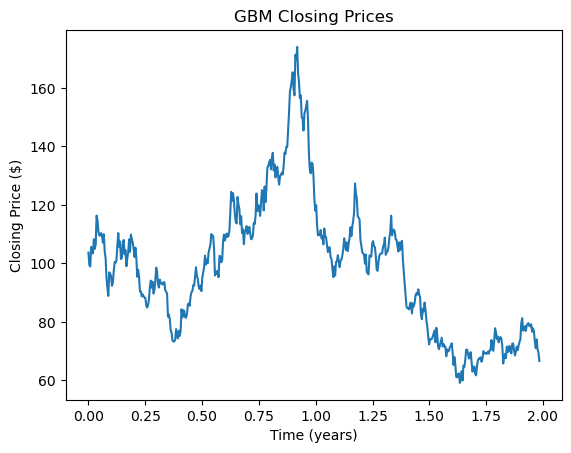

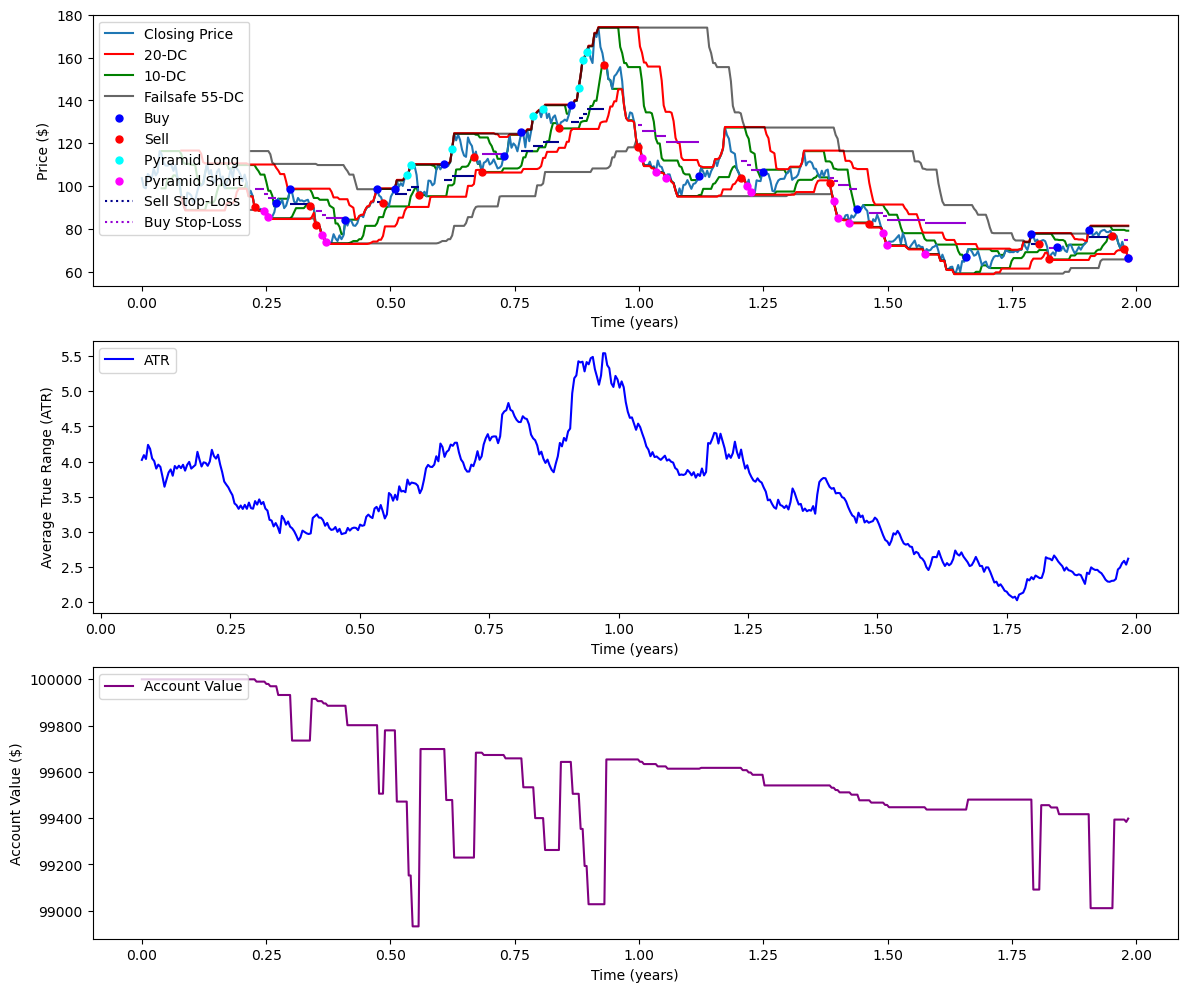

Return after 500 periods: -0.6022 %
Return/MaxDrawdown: -0.563694882994584


In [7]:
# Set System 1 (GBM) Parameters

# Path parameters
mu = 0.5                        # GBM Percentage Drift
sigma = 0.5                     # GBM Percentage Volatility 
S0 = 100                        # Initial Stock Price 
n = 500                         # Number of trading periods (days)
prices_per_n = 4                # Number of price points per period (for calculation of Open, High, Low, and Close)
path_params = [mu, sigma, S0, n, prices_per_n]

# Strategy Parameters
initial_account_size = 100000   # Starting account balance
entry_breakout_period = 20      # Lookback period of entry Donchian Channel
exit_breakout_period = 10       # Lookback period of exit Donchian Channel
failsafe_breakout_period = 55   # Lookback period of entry Donchian Channel of last resort (if trade is skipped)
exposure = 0.01                 # Risk Exposure: percent of account equity leveraged for a unit
big_point_value = 1             # Dollar value of contract
slippage_period = 1             # Lookforward period for the worst price
trans_fee = 10                  # Flat transaction fee
strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]

# Instantiate and Run System 1 (GBM) Simulation
system1 = sim_system1()
system1.sim_stochastic(path_params)
system1.sim_strategy(strategy_params, debug=False)    # debug=True to print transaction log

print("Return after", len(system1.close), "periods:", np.round((system1.account_evolution[-1]/initial_account_size-1)*100,4), "%")
print("Return/MaxDrawdown:", (system1.account_evolution[-1]/initial_account_size-1) / (1-np.min(system1.account_evolution)/initial_account_size))

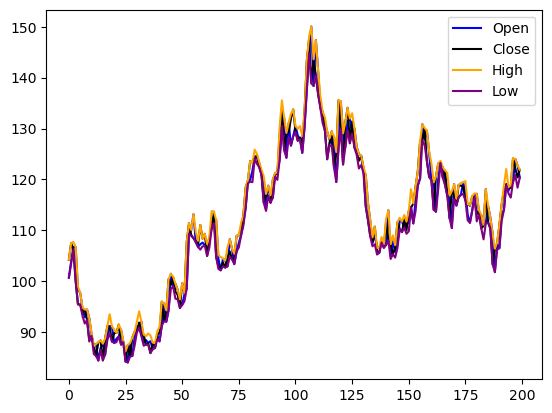

In [4]:
# OHCL Generation

plt.plot(system1.open, color="blue", label="Open")
plt.plot(system1.close, color="black", label="Close")
plt.plot(system1.high, color="orange", label="High")
plt.plot(system1.low, color="purple", label="Low")
plt.legend()

The simulation of System 1 with GBM prices highlights some of the primary mechanisms through which the Turtle Trading System aims to generate profits. By entering at the breakout of a Donchian channel with a longer lookback period than the one signaling its exit, the system is seeks to enter at the onset of large and prolonged price movements, ride out any subsequent trends, and exit if a major reversal occurs. However, this strategy suffers during extended periods of rangebound prices, or when the price oscillates between the Donchian channels without major trending. When prices are rangebound and volatility is low, both the entry and exit Donchian channels become narrower, rendering the system more vulnerable to false signals from minor price fluctuations and short-term noise. Likewise, when prices are rangebound but volatility is high, the system often becomes trapped in a sequence of losing trades. During these "whipsaw" periods, entry breakouts are triggered but swiftly followed by losing exit breakouts, as the price swings within, but does not substantially surpass, the entry Donchian channels. Consequently, even System 1 will continue to enter losing trades, believing that a winning breakout must soon follow due to its previous breakout classifcation. Nevertheless, susceptibility to such whipsaw can ultimately be viewed as a symptom of readiness to embark on potential trends, which can be sufficiently lucrative provided that the GBM drift parameter is close enough to 1 in absolute value.

Also central to the Turtle Trading System is its use of aggressive pyramiding to increase exposure to a significant trend, reflecting the belief that large price movements are likely to continue. Risk is somewhat managed by adjusting the stop-loss in the same direction as the pyramid, but the heightened exposure still leads to substantial appreciation and drawdowns of the equity curve. The profitability of pyramiding and trailing stop-losses is particularly sensitive to slippage costs, themselves worsened by a high slippage period and volatility.

With GBM prices, the implementation of absolute volatility-based position sizing invariably results in smaller positions when the price is high and the percentage volatility parameter remains constant.$^6$ This is because sigma is defined as the standard deviation of the annualized log returns; a given $\sigma$ is able to generate greater variation of absolute prices when the price level is high. As such, absolute volatility tends to increase towards the end of an uptrend and decrease towards the end of a downtrend, resulting in exploding or vanishing ATR and risk-adjusted position sizes. ATR typically remains $\gt 1$ unless $\sigma$ and the price level are close to 0.

### II. ii. System 2 with GBM prices

System 2 differs from System 1 primarily in the length of its entry and exit Donchian channels, entering at the breakout of the 55-period DC and exiting at the breakout of the 20-DC. System 2 also abandons the previous breakout classification, entering any breakout regardless of the profitability of the previous artifical trade. While the latter distinction leads to a greater number of trades, we would expect System 2 to be less susceptible to small price movements due to the larger reach of its Donchian channels.

In [5]:
# Define the System 2 Simulation Object

class sim_system2():
    def __init__(self):
        # Path attributes
        self.path_params = None
        self.path = None
        self.open = None
        self.close = None
        self.high = None
        self.low = None
        
        # Strategy attributes
        self.account_evolution = None
        self.profit = None
        self.num_trans = 0

    def sim_stochastic(self, path_params, plot=True):
        ''' Generate synthetic prices using Geometric Brownian Motion (GBM) '''
        mu, sigma, S0, n, prices_per_n = path_params 
        
        T = n / 252    
        dt = T / (prices_per_n*n)
        t = np.linspace(0, T, n)   
        self.path_params = mu, sigma, S0, n, prices_per_n, t 
        
        #Generate GBM prices
        St = np.exp(
            (mu - sigma**2/2)*dt
            + sigma * np.random.normal(0, np.sqrt(dt), size=(prices_per_n*n)))
        
        St = S0*St.cumprod()
        self.path = St
        self.open = St[0::prices_per_n]
        self.close = St[prices_per_n-1::prices_per_n]
        St_reshaped = St.reshape(-1, prices_per_n)
        self.high = np.max(St_reshaped, axis=1)
        self.low = np.min(St_reshaped, axis=1)

        if plot==True:
            plt.plot(t, self.close)
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.title("GBM Prices")
            plt.show()
        
    def sim_strategy(self, strategy_params, plot=True, debug=False):
        ''' Implement System 1 on synthetic GBM Prices Data'''
        initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee = strategy_params
        mu, sigma, S0, n, prices_per_n, t = self.path_params
     
        # Initialize Donchian Channels
        long_entry_channel = np.full_like(self.close, np.nan)
        long_exit_channel = np.full_like(self.close, np.nan)
        short_entry_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        
        # Initialize Stop Loss
        sell_stop_loss = np.full_like(self.close, np.nan)
        buy_stop_loss = np. full_like(self.close, np.nan)
        
        # Initialize Signals
        buy_signal = np.full_like(self.close, np.nan)
        sell_signal = np.full_like(self.close, np.nan)
        pyramid_buy_signal = np.full_like(self.close, np.nan)
        pyramid_sell_signal = np.full_like(self.close, np.nan)

        # Initialize Volatility Variables
        TR = np.full_like(self.close, np.nan)
        ATR = np.full_like(self.close, np.nan)
        TR2 = np.full_like(self.close, np.nan)
        ATR2 = np.full_like(self.close, np.nan)

        # Initialize Account Variables
        profit = np.full_like(self.close, np.nan)
        account_size = np.full_like(self.close, initial_account_size)
    
        # Initialize States
        hold_position = None     #"Long", "Short", or None
        num_units = 0
        total_shares = 0
        total_cost = 0
        total_revenue = 0 
        
        ## Begin the simulation:
        for i in range(n):
            
            # Calculate Donchian Channels (DC)
            if i >= entry_breakout_period:
                long_entry_channel[i] = np.max(self.close[i-entry_breakout_period:i+1])
                short_entry_channel[i] = np.min(self.close[i-entry_breakout_period:i+1])
            if i >= exit_breakout_period:
                long_exit_channel[i] = np.min(self.close[i-exit_breakout_period:i+1])
                short_exit_channel[i] = np.max(self.close[i-exit_breakout_period:i+1])
                
            # Calculate True Range (TR)
            if i > 0:
                TR[i] = max(self.high[i] - self.low[i], np.abs(self.high[i] - self.close[i-1]), np.abs(self.low[i] - self.close[i-1])) #np.max()
            
            # Calculate Average True Range (ATR)
            if i == 20:
                ATR[i] = np.mean(TR[i-20+1:i+1])
            elif i > 20:
                ATR[i] = (ATR[i-1]*(20-1) + TR[i]) / 20

            # "Burn in" simulation: delay trading until all indicators take on real values
            if i < max(entry_breakout_period, exit_breakout_period):
                continue
            
        ## Simulate Trades
            # Long Entry
            if hold_position==None and self.close[i] > long_entry_channel[i-1]:
                long_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else:
                    hold_position = "Long"
                    buy_signal[i] = self.close[i]

                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    sell_stop_loss[i:] = buy_price - 2*ATR[i]
                    initial_sell_stop = sell_stop_loss[i]
                    initial_long_ATR = ATR[i]
                    total_shares += long_shares
                    total_cost += cost 
                    num_units += 1
                    
                    if debug==True:
                        print("LONG ENTRY ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            # Pyramid Long
            elif hold_position=="Long" and num_units < 4 and self.close[i] > buy_price + 0.5*initial_long_ATR:
                long_unit = min(max(0,long_unit + 0.5*initial_long_ATR), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else: 
                    pyramid_buy_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    initial_sell_stop = initial_sell_stop + 0.5 * initial_long_ATR
                    sell_stop_loss[i:] = initial_sell_stop
                    total_shares += long_shares
                    total_cost += cost
                    num_units += 1
                    
                    if debug==True:
                        print("LONG PYRAMID ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            # Long Exit
            elif hold_position=="Long" and (self.close[i] <= sell_stop_loss[i-1] or self.close[i] < long_exit_channel[i-1]):                      
                hold_position = None
                sell_signal[i] = self.close[i]
                
                #Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                else:
                    sell_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                revenue = total_shares * sell_price
                account_size[i+1:] = account_size[i] + revenue
                profit[i] = revenue - total_cost
                sell_stop_loss[i:] = np.nan
                    
                if debug==True:
                    print("LONG EXIT ( t=", i/n*T,")")
                    print("Shares Sold:", total_shares)
                    print("Sell Price:", sell_price)
                    print("Actual Price:", self.close[i])
                    print("Revenue:", revenue)
                    print("Total Cost:", total_cost)
                    print("profit:", profit[i])
                    print("______________________")
                    
                total_cost = 0
                total_shares = 0 
                num_units = 0

            # Short Entry
            elif hold_position==None and self.close[i] < short_entry_channel[i-1]:
                short_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares == 0:
                    continue
                else:
                    hold_position = "Short"
                    sell_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    buy_stop_loss[i:] = sell_price + 2*ATR[i]
                    initial_buy_stop = buy_stop_loss[i]
                    initial_short_ATR = ATR[i]
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                                    
                    if debug==True:
                        print("SHORT ENTRY ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            # Pyramid Short
            elif hold_position=="Short" and num_units < 4 and self.close[i] < sell_price - 0.5*initial_short_ATR:
                short_unit = min(max(0,short_unit + 0.5*initial_short_ATR), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares==0:
                    continue
                else: 
                    pyramid_sell_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    initial_buy_stop = initial_buy_stop - 0.5 * initial_short_ATR
                    buy_stop_loss[i:] = initial_buy_stop
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                    
                    if debug==True:
                        print("SHORT PYRAMID ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            # Short Exit
            elif hold_position=="Short" and (self.close[i] >= buy_stop_loss[i-1] or self.close[i] > short_exit_channel[i-1]):                     
                hold_position = None
                buy_signal[i] = self.close[i]
    
                #Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                else:
                    buy_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                cost = total_shares * buy_price
                profit[i] = total_revenue - cost
                account_size[i+1:] = account_size[i] + profit[i]
                buy_stop_loss[i:] = np.nan 
                
                if debug==True:
                    print("SHORT EXIT ( t=", i/n*T,")")
                    print("Shares Bought:", total_shares)
                    print("Buy Price:", buy_price)
                    print("Actual Price:", self.close[i])
                    print("Cost:", cost)
                    print("Total Revenue:", total_revenue)
                    print("profit:", profit[i])
                    print("______________________")
                
                total_shares = 0
                total_revenue = 0
                num_units = 0
                    
        # Close all active positions in the final period
        if hold_position=="Long":
            sell_price = self.close[-1]
            sell_signal[-1] = self.close[-1]
            revenue = total_shares * sell_price
            profit[-1] = revenue - total_cost
            account_size[-1] = account_size[-2] + revenue
        elif hold_position=="Short":
            buy_price = self.close[-1]
            buy_signal[-1] = self.close[-1]
            cost = total_shares * buy_price
            profit[-1] = total_revenue - cost
            account_size[-1] = account_size[-2] + profit[-1]
        
        # Update account statistics
        self.account_evolution = account_size
        self.profit = profit
        self.num_trans = np.sum(~np.isnan(buy_signal))
            
        # Optional: Plot Closing Prices, ATR, and Equity Curve
        if plot==True:
            plt.figure(figsize=(14,15))
            
            # Plot Trades
            plt.subplot(3,1,1)
            plt.plot(t, self.close, label="Price")
            plt.plot(t, long_entry_channel+0.0025*S0, 'r', label=f"{entry_breakout_period}-DC", zorder=2)
            plt.plot(t, long_exit_channel, 'g', label=f"{exit_breakout_period}-DC", zorder=1)
            plt.plot(t, short_entry_channel-0.0025*S0, 'r', zorder=2)
            plt.plot(t, short_exit_channel, 'g', zorder=1)
            plt.scatter(t, buy_signal, color='b', label="Buy", zorder=3, s=25)
            plt.scatter(t, sell_signal, color='r', label="Sell", zorder=3, s=25)
            plt.scatter(t, pyramid_buy_signal, color="cyan", label="Pyramid Long", zorder=2, s=25)
            plt.scatter(t, pyramid_sell_signal, color="magenta", label="Pyramid Short", zorder=2, s=25)
            
            # Plot Stop Loss levels
            for i in range(n-1):
                if not np.isnan(sell_stop_loss[i]):
                    plt.hlines(sell_stop_loss[i], t[i], t[i+1], color="darkblue", linestyle="dotted", zorder=2)
                if not np.isnan(buy_stop_loss[i]):
                    plt.hlines(buy_stop_loss[i], t[i], t[i+1], color="darkviolet", linestyle="dotted", zorder= 2)
            plt.plot([], color="darkblue", linestyle="dotted", label="Sell Stop-Loss")
            plt.plot([], color="darkviolet", linestyle="dotted", label="Buy Stop-Loss")
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.legend(loc="upper left")

            # PLot ATR
            plt.subplot(3,1,2)
            plt.plot(t, ATR, 'b', label="ATR")
            plt.xlabel("Time (years)")
            plt.ylabel("Average True Range (ATR)")
            plt.legend(loc="upper left")
            plt.plot(t, ATR2, "black")
            
            # Plot Equity Curve
            plt.subplot(3,1,3)
            plt.plot(t, self.account_evolution, color="purple", label="Account Value")
            plt.xlabel("Time (years)")
            plt.ylabel("Account Value ($)")
            plt.legend(loc="upper left")

            plt.show()

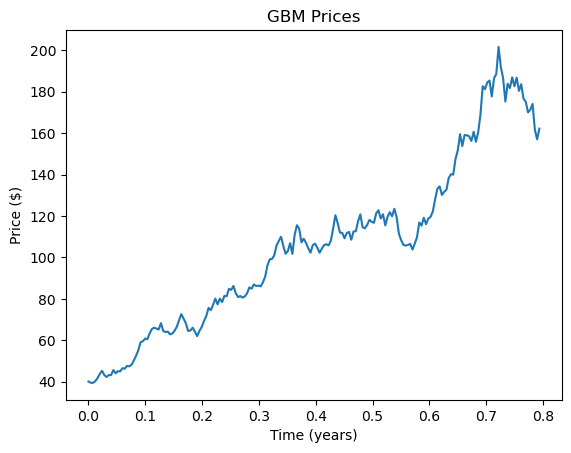

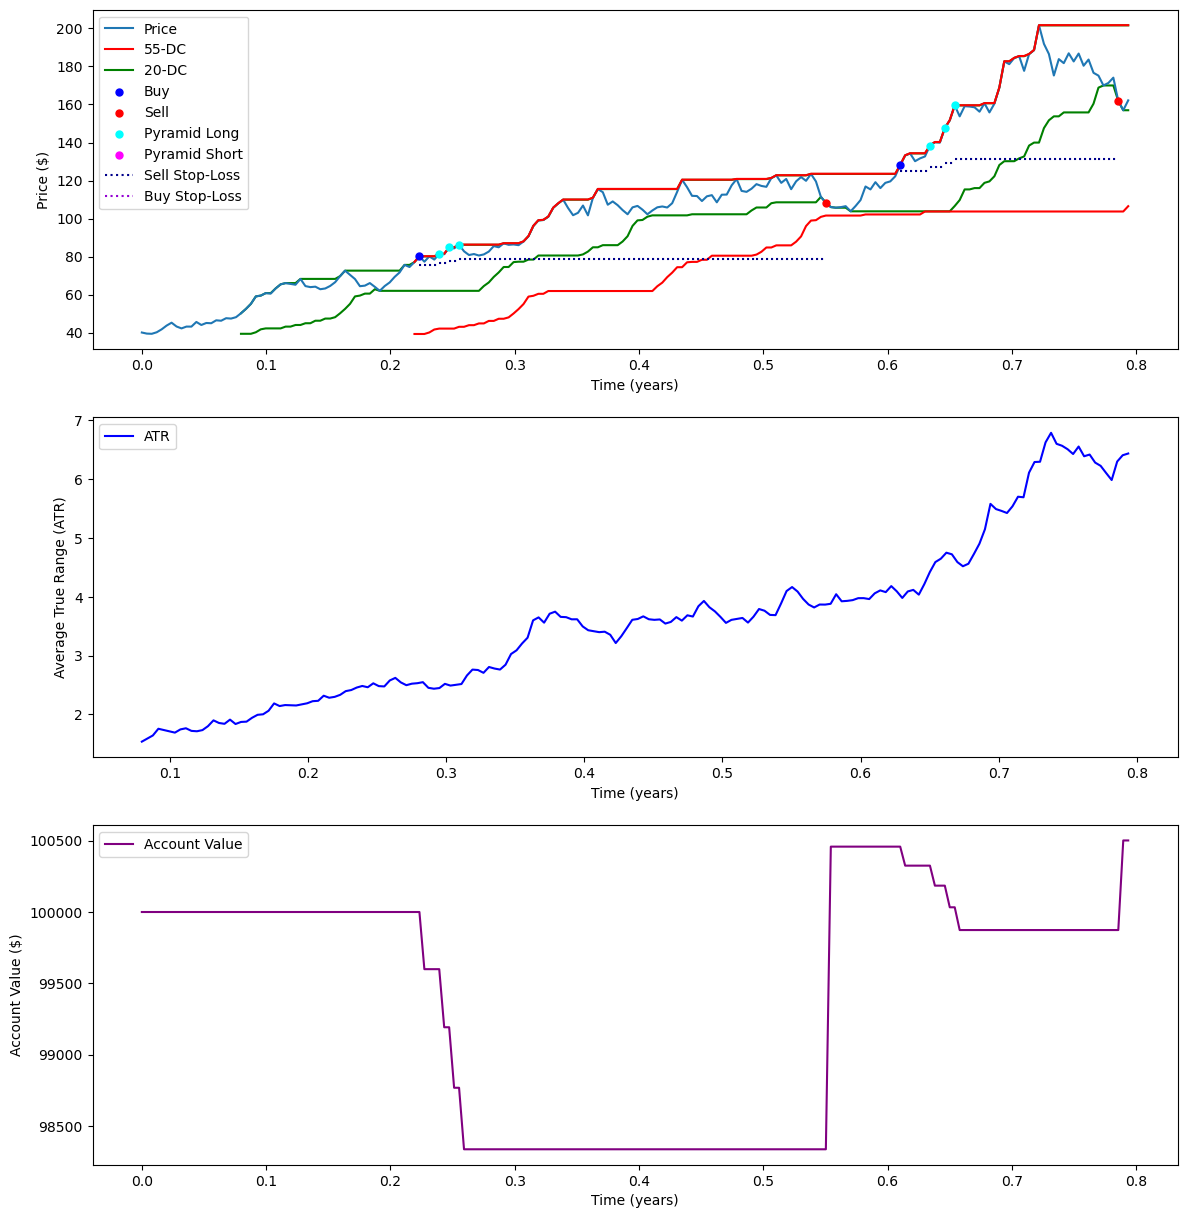

Return after 200 periods: 0.5014 %
Return/MaxDrawdown: 0.3015478938116708


In [5]:
# Set System 2 (GBM) Parameters

# Path parameters
mu = 0.5    
sigma = 0.5
S0 = 40       
n = 200
prices_per_n = 4 
path_params = [mu, sigma, S0, n, prices_per_n]

# Strategy Parameters
initial_account_size = 100000  
entry_breakout_period = 55    
exit_breakout_period = 20   
exposure = 0.01                
big_point_value = 1          
slippage_period = 1            
trans_fee = 10                 
strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]

# Instantiate and Run System 2 (GBM) Simulation
system2 = sim_system2()
system2.sim_stochastic(path_params)
system2.sim_strategy(strategy_params, debug=False) 

print("Return after", len(system2.close), "periods:", np.round((system2.account_evolution[-1]/initial_account_size-1)*100,4), "%")
print("Return/MaxDrawdown:", (system2.account_evolution[-1]/initial_account_size-1) / (1-np.min(system2.account_evolution)/initial_account_size))

The two systems take markedly distinct approaces to the balance between insulating from short-term noise and preparedness to exploit emerging trends. When confronted with GBM prices of moderate drift and volatility, System 2 displays greater resilience to minor price movements, as it requires longer periods of low-volatility rangebounding to contract the Donchian Channels. However, System 2 frequently overlooks short to moderate trends that System 1 is able to identify. Despite these differences, System 2 is also prone to whipsaw or rangebounding within the entry Donchian channel, primarily due to the close proximity of stop-loss orders ($2 \times ATR$ from the entry price). This presents an undeniable inconsistency located at the heart of System 2: it attempts to accomodate for greater local volatility by lengthening the Donchian channels, but fails to adjust the stop-loss orders that so often lead to premature exit.

### II. iii. Monte Carlo 1: Comparing System 1 and System 2 Return Distributions (GBM)

Having defined our simulation modelling objects for both systems, we now conduct a Monte Carlo simulation to investigate their aggregate performance across a wide range of potential market conditions. We simulate 500 GBM price paths with uniformly random GBM drift and volatility parameters in the ranges of $-1 \leq \mu \leq 1$ and $0 \leq \sigma \leq 1$. For each path, multiple variations of System 1 and System 2 are simulated, differing by the period of their exit and entry Donchian channels. Systems with longer entry and exit breakout periods require longer "burn-in" times before they are able to execute trades, as it takes a greater number of price points until their Donchian channels become real-valued. Accordingly, we adjust the burn-in time such that each system has 300 periods of active active trading time, although the exact frequency of trades will still vary by the period of the breakout Donchian channels.

In [6]:
# Monte Carlo 1: Comparing System 1 and System 2 Return Distributions (GBM)

# Initialize storage arrays and counter
sys1_returns = np.array([])
sh_sys1_returns = np.array([])
ex_sys1_returns = np.array([])
sys2_returns = np.array([])
sh_sys2_returns = np.array([])
ex_sys2_returns = np.array([])


# Set constant parameters and counter
S0 = 40      
initial_account_size = 100000  
exposure = 0.01              
big_point_value = 1        
slippage_period = 1     
trans_fee = 10
prices_per_n = 4
counter = 0 

for i in range(500):
    
    # Randomly sample path parameters    
    mu =  np.random.rand()*2-1          # -1 <= mu <= 1
    sigma = np.random.rand()           #  0 <= sigma <= 1

    # Simulate System 1 (20-DC entry, 10-DC exit)
    n = 355
    path_params = [mu, sigma, S0, n, prices_per_n]
    entry_breakout_period = 20   
    exit_breakout_period = 10
    failsafe_breakout_period = 55
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    sys1 = sim_system1()
    sys1.sim_stochastic(path_params, plot=False)
    sys1.sim_strategy(strategy_params, plot=False)
    returns = (sys1.account_evolution[-1]/initial_account_size-1)*100
    sys1_returns = np.append(sys1_returns, returns)
    
    # Simulate Extended System 1 (55-DC entry, 20-DC exit)
    n = 355
    path_params = [mu, sigma, S0, n, prices_per_n]
    entry_breakout_period = 55   
    exit_breakout_period = 20
    failsafe_breakout_period = 100
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    ex_sys1 = sim_system1()
    ex_sys1.sim_stochastic(path_params, plot=False)
    ex_sys1.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys1.account_evolution[-1]/initial_account_size-1)*100
    ex_sys1_returns = np.append(ex_sys1_returns, returns)
    
    # Simulate Shortened System 1 (10-DC entry, 5-DC exit)
    n = 310
    path_params = [mu, sigma, S0, n, prices_per_n]
    entry_breakout_period = 10   
    exit_breakout_period = 5
    failsafe_breakout_period = 20
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    sh_sys1 = sim_system1()
    sh_sys1.sim_stochastic(path_params, plot=False)
    sh_sys1.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys1.account_evolution[-1]/initial_account_size-1)*100
    sh_sys1_returns = np.append(sh_sys1_returns, returns)
    
    # Simulate System 2 (55-DC entry, 20-DC exit)
    n = 355
    path_params = [mu, sigma, S0, n, prices_per_n]
    entry_breakout_period = 55   
    exit_breakout_period = 20   
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    sys2 = sim_system2()
    sys2.sim_stochastic(path_params, plot=False)
    sys2.sim_strategy(strategy_params, plot=False)
    returns = (sys2.account_evolution[-1]/initial_account_size-1)*100
    sys2_returns = np.append(sys2_returns, returns)
    
    # Simulate Extended System 2 (70-DC entry, 45-DC exit)
    n = 370
    path_params = [mu, sigma, S0, n, prices_per_n]
    entry_breakout_period = 70   
    exit_breakout_period = 45   
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    ex_sys2 = sim_system2()
    ex_sys2.sim_stochastic(path_params, plot=False)
    ex_sys2.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys2.account_evolution[-1]/initial_account_size-1)*100
    ex_sys2_returns = np.append(ex_sys2_returns, returns)
    
    # Simulate Shortened System 2 (20-DC entry, 10-DC exit)
    n = 320
    path_params = [mu, sigma, S0, n, prices_per_n]
    entry_breakout_period = 20   
    exit_breakout_period = 10   
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    sh_sys2 = sim_system2()
    sh_sys2.sim_stochastic(path_params, plot=False)
    sh_sys2.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys2.account_evolution[-1]/initial_account_size-1)*100
    sh_sys2_returns = np.append(sh_sys2_returns, returns)
    
    counter += 1
    print('\rIteration number: {}'.format(counter), end='')

Iteration number: 500

In [7]:
# Remove extreme outliers
filtered_bin = []
for r in [sys1_returns, sh_sys1_returns, ex_sys1_returns, sys2_returns, sh_sys2_returns, ex_sys2_returns]:
    lower, upper = np.percentile(r, [1,99])
    filtered = r[(r > lower) & (r < upper)]
    filtered_bin.append(filtered)
sys1_returns, sh_sys1_returns, ex_sys1_returns, sys2_returns, sh_sys2_returns, ex_sys2_returns = filtered_bin

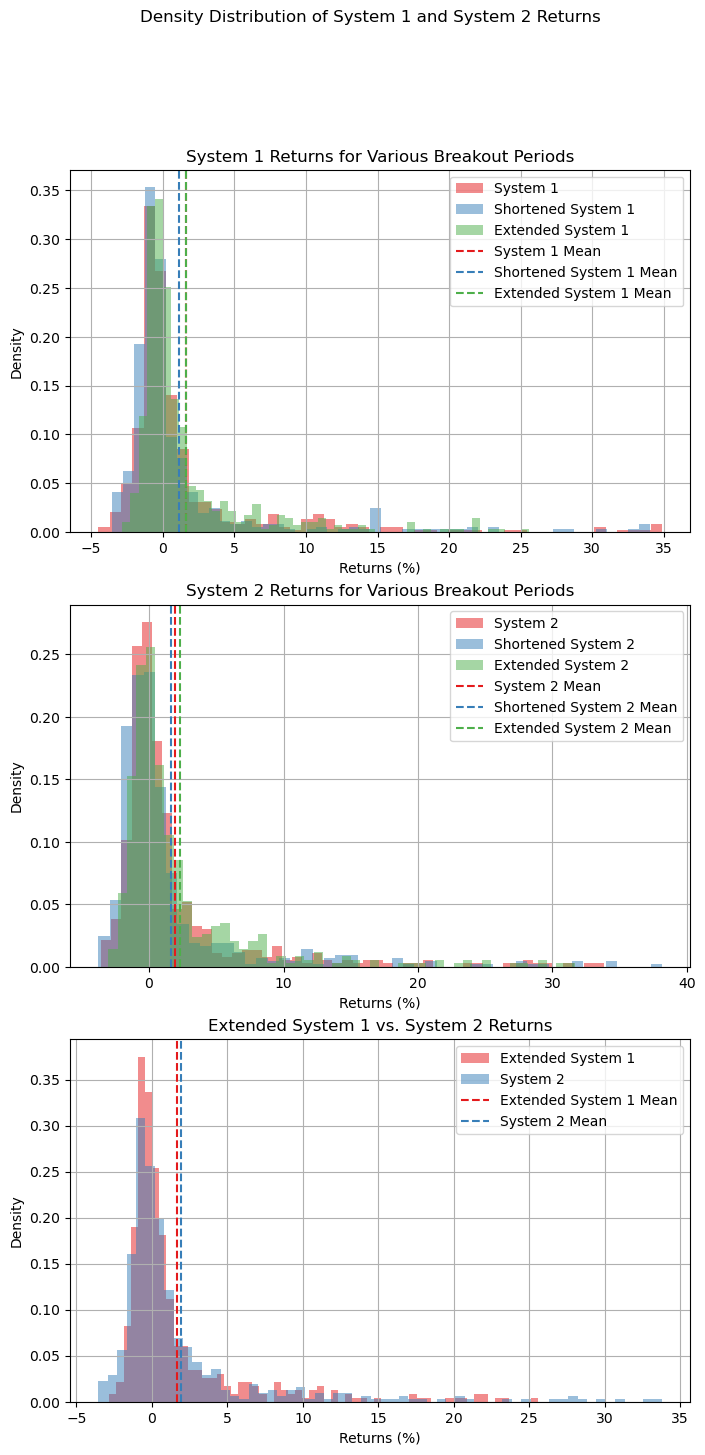

------------- SYSTEM 1 -------------
System 1 Mean: 1.6550025578573524
Shortened System 1 Mean: 1.130387422306266
Extended System 1 Mean**: 1.6524070279832892

------------- SYSTEM 2 -------------
System 2 Mean**: 1.947048745048851
Shortened System 2 Mean: 1.652951897688395
Extended System 2 Mean: 2.3039534393804972


In [8]:
# Plot the results
plt.figure(figsize=(8,16))
plt.suptitle('Density Distribution of System 1 and System 2 Returns')

plt.subplot(3,1,1)
plt.hist(sys1_returns, alpha=0.5, bins=50, label='System 1', color="#e41a1c", density=True)
plt.hist(sh_sys1_returns, alpha=0.5, bins=50, label='Shortened System 1', color="#377eb8", density=True)
plt.hist(ex_sys1_returns, alpha=0.5, bins=50, label='Extended System 1', color="#4daf4a", density=True)
plt.axvline(np.mean(sys1_returns), color="#e41a1c", linestyle="dashed", label="System 1 Mean")
plt.axvline(np.mean(sh_sys1_returns), color="#377eb8", linestyle="dashed", label="Shortened System 1 Mean")
plt.axvline(np.mean(ex_sys1_returns), color="#4daf4a", linestyle="dashed", label="Extended System 1 Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("System 1 Returns for Various Breakout Periods")
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.hist(sys2_returns, alpha=0.5, bins=50, label='System 2', color="#e41a1c", density=True)
plt.hist(sh_sys2_returns, alpha=0.5, bins=50, label='Shortened System 2', color="#377eb8", density=True)
plt.hist(ex_sys2_returns, alpha=0.5, bins=50, label='Extended System 2', color="#4daf4a", density=True)
plt.axvline(np.mean(sys2_returns), color="#e41a1c", linestyle="dashed", label="System 2 Mean")
plt.axvline(np.mean(sh_sys2_returns), color="#377eb8", linestyle="dashed", label="Shortened System 2 Mean")
plt.axvline(np.mean(ex_sys2_returns), color="#4daf4a", linestyle="dashed", label="Extended System 2 Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("System 2 Returns for Various Breakout Periods")
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.hist(ex_sys1_returns, alpha=0.5, bins=60, label='Extended System 1', color="#e41a1c", density=True)
plt.hist(sys2_returns, alpha=0.5, bins=60, label='System 2', color="#377eb8", density=True)
plt.axvline(np.mean(ex_sys1_returns), color="#e41a1c", linestyle="dashed", label="Extended System 1 Mean")
plt.axvline(np.mean(sys2_returns), color="#377eb8", linestyle="dashed", label="System 2 Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("Extended System 1 vs. System 2 Returns")
plt.legend()
plt.grid(True)

plt.show()

print("------------- SYSTEM 1 -------------")        
print("System 1 Mean:", np.mean(sys1_returns))
print("Shortened System 1 Mean:", np.mean(sh_sys1_returns))
print("Extended System 1 Mean**:", np.mean(ex_sys1_returns))
print()
print("------------- SYSTEM 2 -------------")        
print("System 2 Mean**:", np.mean(sys2_returns))
print("Shortened System 2 Mean:", np.mean(sh_sys2_returns))
print("Extended System 2 Mean:", np.mean(ex_sys2_returns))

From the density distribution plots of the final return to the account for GBM parameter values in the ranges of $-1 \leq \mu \leq 1$ and $0 \leq \sigma \leq 1$, we observe that all systems-- regardless of the breakout period --tend to center between 0-3% returns. However, shorter period system distributions, with larger negative shoulders and only slightly extended positive tails, produce low average returns relative to their normal and extended counterparts. Increasing the Donchian channel breakout period appears to increase average returns for both systems across the sampled parameters, likely due to decreased sensitivty to non-trending breakout signals. Extending the Donchian channels too far, however, tips the balance of protecting against non-trending breakout signals in favor of missing trending breakout signals altogether, so we see a reduction in the average number of transactions and marginal average returns. We can amplify or dampen this effect by re-running the Monte Carlo simulation for extreme values of $\mu$ and $\sigma$. When $\mu$ is fixed close to 1 and $\sigma$ is left to vary, all systems exhibit greater positive average returns, but extended systems display truncated positive tails, indicating that they are less able to capitalize from high lucrative GBM paths. When $\sigma$ is fixed close to 1 and $\mu$ is left to vary, the average return of all systems suffer, but longer systems suffer less, as greater non-trending price movements are required to trigger breakouts.

The third plot displays the densitiy distributions of the extended System 1 and System 2, both of which share the same breakout periods (55-DC Entry / 20-DC Exit). Therefore, the only variation in their returns is attributable to the extended System 1's classification of previous breakouts, with which it will ignore any breakouts that follow a winning breakout, regardless of the direction of trade. Previous breakout classification outperforms when winning breakouts are more likely to follow losing breakouts and vice versa or winning breakouts are less likely to follow each other. Both systems exhibit very similar returns for the GBM parameter ranges of $-1 \leq \mu \leq 1$ and $0 \leq \sigma \leq 1$, indicating that winning and losing breakouts follow winning breakouts at roughly the same rate. However, when $\mu$ is fixed close to 1, System 2 strongly outperforms the extended System 1, and this advantage grows when $\sigma$ decreases simultaneously. This could indicate that System 1's previous breakout classification hinders it from re-entering high consistent trends, as a series of sparse but winning breakouts crowd out entry. When $\sigma$ is fixed close to 1, the extended System 1 begins to outperform System 2, perhaps implying that highly volatile price paths may contain a greater proportion of losing breakouts following winning ones. However, it is likely that System 1's previous breakout classification simply scales down the number of entries in periods in periods where losing breakouts are frequent due to whipsaw.

### II. iv. Monte Carlo 2: GBM Path Analysis

What does a lucrative GBM price path look like? What does a catastrophic GBM path look like? We conduct a second Monte Carlo simulation to explore the nature of the GBM paths which result in extreme System 1 and 2 performances. We simulate 100 distinct GBM paths with uniformly random drift and volatility parameters in the ranges of $-1 \leq \mu \leq 1$ and $0 \leq \sigma \leq 2$. For each path, we calculate the returns and compare them to several predefined thresholds (p1, p2, p3, n1, n2, n3), representing various levels of positive (p) or negative (n) returns. Paths in which the system exceed such thresholds are saved and plotted against all sampled paths.

In [9]:
# Monte Carlo 2: GBM Path Analysis (System 1)

# Initialize path and parameter storage arrays
all_paths = []
p1_paths = []
p2_paths = []
p3_paths = []
p1_mu = []
p2_mu = []
p3_mu = []
p1_sigma = []
p2_sigma = []
p3_sigma = []
n1_paths = []
n2_paths = []
n3_paths = []
n1_mu = []
n2_mu = []
n3_mu = []
n1_sigma = []
n2_sigma = []
n3_sigma = []

# Set thresholds
p1 = 1
p2 = 2
p3 = 5
n1 = -1
n2 = -2
n3 = -5
P = 100   #Number of sampled paths

# Set constant parameters and counter
initial_account_size = 100000  
exposure = 0.01              
big_point_value = 1        
slippage_period = 1   
trans_fee = 10
entry_breakout_period = 20   
exit_breakout_period = 10  
failsafe_breakout_period = 55
strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
S0 = 100  
prices_per_n = 4
n = 355
counter = 0 

for i in range(P):
    
    # Set variables    
    mu = np.random.rand()*2-1       # -1 <= mu <= 1
    sigma = np.random.rand()*2      # 0 <= sigma <= 2
    path_params = [mu, sigma, S0, n, prices_per_n]

    # Simulate System 1
    sys1 = sim_system1()
    sys1.sim_stochastic(path_params, plot=False)
    sys1.sim_strategy(strategy_params, plot=False)
    returns = (sys1.account_evolution[-1]/initial_account_size-1)*100

    # Classify paths by performance relative to threshold
    all_paths.append(sys1.path)    
    if returns >= p1:
        p1_paths.append(sys1.path)
        p1_mu.append(mu)
        p1_sigma.append(sigma)
    if returns >= p2:
        p2_paths.append(sys1.path)
        p2_mu.append(mu)
        p2_sigma.append(sigma)
    if returns >= p3:
        p3_paths.append(sys1.path)
        p3_mu.append(mu)
        p3_sigma.append(sigma)
    if returns <= n1:
        n1_paths.append(sys1.path)
        n1_mu.append(mu)
        n1_sigma.append(sigma)
    if returns <= n2:
        n2_paths.append(sys1.path)
        n2_mu.append(mu)
        n2_sigma.append(sigma)
    if returns <= n3:
        n3_paths.append(sys1.path)
        n3_mu.append(mu)
        n3_sigma.append(sigma)
        
    counter += 1
    print('\rIteration number: {}'.format(counter), end='')

Iteration number: 100

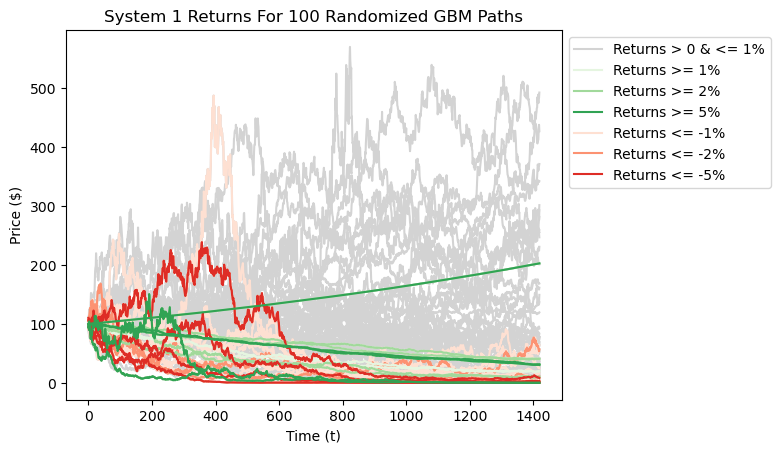

------------- POSITIVE RETURN PATHS -------------
Number of Paths with >= 1% Returns (%): 11
Number of Paths with >= 2% Returns (%): 9
Number of Paths with >= 5% Returns (%): 5

------------- NEGATIVE RETURN PATHS -------------
Number of Paths with <= -1% Returns (%): 17
Number of Paths with <= -2% Returns (%): 7
Number of Paths with <= -5% Returns (%): 4


In [10]:
#Plot the System 1 GBM results
fig, ax = plt.subplots()
global_max=700
for i in all_paths:
    if max(i) <= global_max:
        ax.plot(i, c="lightgrey", zorder=1)
for p1_i in p1_paths:
    if max(p1_i) <= global_max:
        ax.plot(p1_i, c="#e5f5e0", zorder=4)
for p2_i in p2_paths:
    if max(p2_i) <= global_max:
        ax.plot(p2_i, c="#a1d99b", zorder=5)
for p3_i in p3_paths:
    if max(p3_i) <= global_max:
        ax.plot(p3_i, c="#31a354", zorder=7)
for n1_i in n1_paths:
    if max(n1_i) <= global_max:
        ax.plot(n1_i, c="#fee0d2", zorder=2)
for n2_i in n2_paths:
    if max(n2_i) <= global_max:
        ax.plot(n2_i, c="#fc9272", zorder=3)
for n3_i in n3_paths:
    if max(n3_i) <= global_max:
        ax.plot(n3_i, c="#de2d26", zorder=6)

ax.plot([], [], label=f"Returns > 0 & <= {p1}%", c="lightgrey")
ax.plot([], [], label=f"Returns >= {p1}%", c="#e5f5e0")
ax.plot([], [], label=f"Returns >= {p2}%", c="#a1d99b")
ax.plot([], [], label=f"Returns >= {p3}%", c="#31a354") 
ax.plot([], [], label=f"Returns <= {n1}%", c="#fee0d2")
ax.plot([], [], label=f"Returns <= {n2}%", c="#fc9272")
ax.plot([], [], label=f"Returns <= {n3}%", c="#de2d26") 

plt.title(f"System 1 Returns For {P} Randomized GBM Paths")
plt.xlabel("Time (t)")
plt.ylabel("Price ($)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print("------------- POSITIVE RETURN PATHS -------------")        
print(f"Number of Paths with >= {p1}% Returns (%):", len(p1_paths))
print(f"Number of Paths with >= {p2}% Returns (%):", len(p2_paths))
print(f"Number of Paths with >= {p3}% Returns (%):", len(p3_paths))
print()
print("------------- NEGATIVE RETURN PATHS -------------")        
print(f"Number of Paths with <= {n1}% Returns (%):", len(n1_paths))
print(f"Number of Paths with <= {n2}% Returns (%):", len(n2_paths))
print(f"Number of Paths with <= {n3}% Returns (%):", len(n3_paths))

In [11]:
# Monte Carlo 2: GBM Path Analysis (System 2)

# Initialize path and parameter storage arrays
all_paths = []
p1_paths = []
p2_paths = []
p3_paths = []
p1_mu = []
p2_mu = []
p3_mu = []
p1_sigma = []
p2_sigma = []
p3_sigma = []
n1_paths = []
n2_paths = []
n3_paths = []
n1_mu = []
n2_mu = []
n3_mu = []
n1_sigma = []
n2_sigma = []
n3_sigma = []

# Set thresholds 
p1 = 1
p2 = 2
p3 = 5
n1 = -1
n2 = -2
n3 = -5
P = 100   #Number of sampled paths

# Set constant parameters and counter
initial_account_size = 100000  
exposure = 0.01              
big_point_value = 1        
slippage_period = 1   
trans_fee = 10
entry_breakout_period = 55   
exit_breakout_period = 20  
strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
counter = 0 
S0 = 100      
n = 355
prices_per_n = 4

for i in range(P):
    
    # Set variables    
    mu = np.random.rand()*2-1     # -1 <= mu <= 1
    sigma = np.random.rand()*2    # 0 <= sigma <= 2
    path_params = [mu, sigma, S0, n, prices_per_n]

    # Simulate System 1
    sys2 = sim_system2()
    sys2.sim_stochastic(path_params, plot=False)
    sys2.sim_strategy(strategy_params, plot=False)
    returns = (sys2.account_evolution[-1]/initial_account_size-1)*100

    # Classify paths by performance relative to threshold
    all_paths.append(sys2.path)    
    if returns >= p1:
        p1_paths.append(sys2.path)
        p1_mu.append(mu)
        p1_sigma.append(sigma)
    if returns >= p2:
        p2_paths.append(sys2.path)
        p2_mu.append(mu)
        p2_sigma.append(sigma)
    if returns >= p3:
        p3_paths.append(sys2.path)
        p3_mu.append(mu)
        p3_sigma.append(sigma)
    if returns <= n1:
        n1_paths.append(sys2.path)
        n1_mu.append(mu)
        n1_sigma.append(sigma)
    if returns <= n2:
        n2_paths.append(sys2.path)
        n2_mu.append(mu)
        n2_sigma.append(sigma)
    if returns <= n3:
        n3_paths.append(sys2.path)
        n3_mu.append(mu)
        n3_sigma.append(sigma)
        
    counter += 1
    print('\rIteration number: {}'.format(counter), end='')

Iteration number: 100

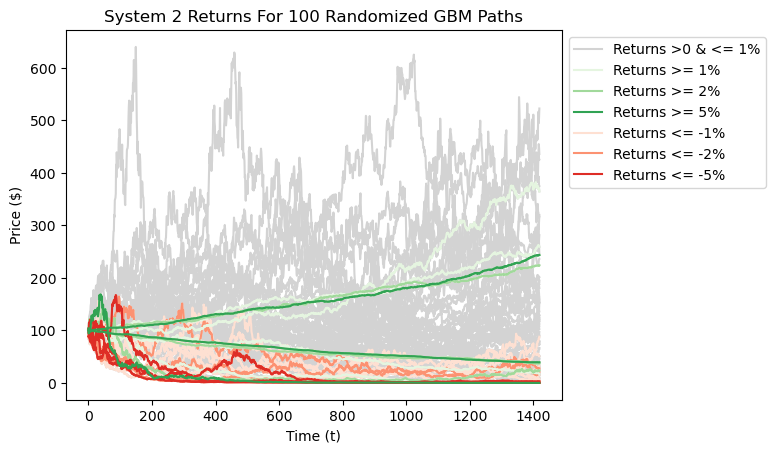

------------- POSITIVE RETURN PATHS -------------
Number of Paths with >= 1% Returns (%): 10
Number of Paths with >= 2% Returns (%): 6
Number of Paths with >= 5% Returns (%): 3

------------- NEGATIVE RETURN PATHS -------------
Number of Paths with <= -1% Returns (%): 14
Number of Paths with <= -2% Returns (%): 7
Number of Paths with <= -5% Returns (%): 4


In [12]:
#Plot the System 2 results
fig, ax = plt.subplots()
global_max=700
for i in all_paths:
    if max(i) <= global_max:
        ax.plot(i, c="lightgrey", zorder=1)
for p1_i in p1_paths:
    if max(p1_i) <= global_max:
        ax.plot(p1_i, c="#e5f5e0", zorder=4)
for p2_i in p2_paths:
    if max(p2_i) <= global_max:
        ax.plot(p2_i, c="#a1d99b", zorder=5)
for p3_i in p3_paths:
    if max(p3_i) <= global_max:
        ax.plot(p3_i, c="#31a354", zorder=7)
for n1_i in n1_paths:
    if max(n1_i) <= global_max:
        ax.plot(n1_i, c="#fee0d2", zorder=2)
for n2_i in n2_paths:
    if max(n2_i) <= global_max:
        ax.plot(n2_i, c="#fc9272", zorder=3)
for n3_i in n3_paths:
    if max(n3_i) <= global_max:
        ax.plot(n3_i, c="#de2d26", zorder=6)

ax.plot([], [], label=f"Returns >0 & <= {p1}%", c="lightgrey")
ax.plot([], [], label=f"Returns >= {p1}%", c="#e5f5e0")
ax.plot([], [], label=f"Returns >= {p2}%", c="#a1d99b")
ax.plot([], [], label=f"Returns >= {p3}%", c="#31a354") 
ax.plot([], [], label=f"Returns <= {n1}%", c="#fee0d2")
ax.plot([], [], label=f"Returns <= {n2}%", c="#fc9272")
ax.plot([], [], label=f"Returns <= {n3}%", c="#de2d26") 

plt.title(f"System 2 Returns For {P} Randomized GBM Paths")
plt.xlabel("Time (t)")
plt.ylabel("Price ($)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

print("------------- POSITIVE RETURN PATHS -------------")
print(f"Number of Paths with >= {p1}% Returns (%):", len(p1_paths))
print(f"Number of Paths with >= {p2}% Returns (%):", len(p2_paths))
print(f"Number of Paths with >= {p3}% Returns (%):", len(p3_paths))
print()
print("------------- NEGATIVE RETURN PATHS -------------")
print(f"Number of Paths with <= {n1}% Returns (%):", len(n1_paths))
print(f"Number of Paths with <= {n2}% Returns (%):", len(n2_paths))
print(f"Number of Paths with <= {n3}% Returns (%):", len(n3_paths))

Starting at the initial price of \\$100, the sampled GBM paths quickly branch out across the plot, representing a diverse range of market conditions. GBM paths resembling exponential decay appear to generate some of the highest and lowest returns in both systems. One possible explanation for this is lies in the calculation of ATR: for a given $\sigma$ and negative $\mu$, the relative or percentage volatility remains constant throughout the price path, but absolute volatility depends on the price level. With an exponentially decaying price path, absolute volatility, and thus ATR, will decay explonentially as well. Consequently, the size of the risk-adjusted short position explodes, resulting in greater variance of final return to the account. Somewhat ironically, the calculation of position sizes is intended to mitigate risk when prices are high and volatile, but results in taking on greater risk when prices converge to zero. 

Occasionally, the expanding position sizes during an exponentially decaying price are pushed into profitability by the increasingly deterministic trend. More often, these GBM paths produce catastrophic outcomes for both systems. Returns below -5% occur frequently when $\mu$ is negative, inflating position sizes due to the low level of absolute volatility, but $\sigma$ is high, as seen by large absolute volatility before the price converges. As these volatile, downtrending price paths converge to zero, they retain enough absolute volatility to create low-frequency oscillations and shallow whipsaw. As the Donchian channels become increasingly narrow, miniscule price fluctuations trigger one or several losing trades, one after the other. Put another way, with sufficiently high relative volatility and negative percentage drift, absolute volatility and ATR do not converge fast enough as the path converges to zero, so the systems enter increasingly large position sizes throughout a low-frequency, rangebound plateau. In contrast to the overall greater robustness to noise observed previously, System 2 does not appear particularly resilient to low-frequency rangebounding, potentially because the level of absolute volatlity becomes small enough, and the plateau flat enough, that the difference breakout periods becomes less relevant. When absolute volalitility is small enough, the primary difference between System 1 and 2 becomes System 1's previous breakout classification, and this helps System 1 escape a greater number of risky trades. 

### II. v. Monte Carlo 3: GBM Parameter Analysis

To make the effects of GBM parameters $\mu$ and $\sigma$ more explicit, we simulate both systems for 2000 GBM paths with uniformly sampled percentage drift and volatility parameters in the ranges of $-1 \leq \mu \leq 1$ and $0 \leq \sigma \leq 1$, and regress the final % return to the account on \$\mu$, $\lvert \mu \rvert$, $\mu ^2$, $\sigma$, $\sigma^2$, as well as interaction terms, $\mu \times \sigma$ and $\lvert \mu \rvert \times \sigma$:

In [13]:
# Monte Carlo 3: GBM Parameter Analysis

# Initialize dataframes
sys1_df = pd.DataFrame(columns=["mu", "sigma", "sys1_returns"])
sys2_df = pd.DataFrame(columns=["mu", "sigma", "sys2_returns"])

# Set constant parameters and counter
initial_account_size = 100000  
exposure = 0.1              
big_point_value = 1        
slippage_period = 1  
trans_fee = 10
S0 = 200
n = 355
prices_per_n = 4
counter = 0 

for i in range(2000):
    # Set variables
    mu = np.random.rand()*2-1     # -1 <= mu <= 1
    sigma = np.random.rand()       # 0 <= sigma <= 1      
    path_params = [mu, sigma, S0, n, prices_per_n]
        
    # Simulate System 1
    entry_breakout_period = 20   
    exit_breakout_period = 10 
    failsafe_breakout_period = 55
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    sys1 = sim_system1()
    sys1.sim_stochastic(path_params, plot=False)
    sys1.sim_strategy(strategy_params, plot=False)
    sys1_returns = (sys1.account_evolution[-1]/initial_account_size-1)*100
    
    # Simulate System 2
    entry_breakout_period = 55   
    exit_breakout_period = 20   
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    sys2 = sim_system2()
    sys2.sim_stochastic(path_params, plot=False)
    sys2.sim_strategy(strategy_params, plot=False)
    sys2_returns = (sys2.account_evolution[-1]/initial_account_size-1)*100
    
    # Append observations
    sys1_obs = pd.DataFrame({"mu": [mu], "sigma": [sigma], "sys1_returns": [sys1_returns]})
    sys2_obs = pd.DataFrame({"mu": [mu], "sigma": [sigma], "sys2_returns": [sys2_returns]})
    sys1_df = pd.concat([sys1_df, sys1_obs], ignore_index=True)
    sys2_df = pd.concat([sys2_df, sys2_obs], ignore_index=True)
    
    counter += 1
    print('\rIteration number: {}'.format(counter), end='')

Iteration number: 2000

In [14]:
# Generate System 1 Variables
sys1_df['mu_abs'] = sys1_df['mu'].abs()
sys1_df['mu_sq'] = sys1_df['mu'] **2
sys1_df['sigma_sq'] = sys1_df['sigma'] **2
sys1_df['mu_x_sigma'] = sys1_df['mu'] * sys1_df['sigma'] 
sys1_df['mu_abs_x_sigma'] = sys1_df['mu'].abs() * sys1_df['sigma']

# Generate System 2 Variables
sys2_df['mu_abs'] = sys2_df['mu'].abs()
sys2_df['mu_sq'] = sys2_df['mu'] **2
sys2_df['sigma_sq'] = sys2_df['sigma'] **2
sys2_df['mu_x_sigma'] = sys2_df['mu'] * sys2_df['sigma'] 
sys2_df['mu_abs_x_sigma'] = sys2_df['mu'].abs() * sys2_df['sigma']

In [15]:
# Multivariate Linear Regression with Heteroskedasticity-Robust Standard Errors (System 1)

X = sys1_df[["mu", 'mu_sq', 'mu_abs', "sigma", 'sigma_sq', "mu_x_sigma", "mu_abs_x_sigma"]] 
y = sys1_df["sys1_returns"] 
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
robust_results = results.get_robustcov_results()
print("______________________________________")
print("SYSTEM 1:")
print(robust_results.summary())

______________________________________
SYSTEM 1:
                            OLS Regression Results                            
Dep. Variable:           sys1_returns   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.62e-235
Time:                        12:28:30   Log-Likelihood:                -7025.8
No. Observations:                2000   AIC:                         1.407e+04
Df Residuals:                    1992   BIC:                         1.411e+04
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [16]:
# Multivariate Linear Regression with Heteroskedasticity-Robust Standard Errors (System 2)

X = sys2_df[["mu", 'mu_sq', 'mu_abs', "sigma", 'sigma_sq', "mu_x_sigma", "mu_abs_x_sigma"]] 
y = sys2_df["sys2_returns"] 
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
robust_results = results.get_robustcov_results()
print("______________________________________")
print("SYSTEM 2:")
print(robust_results.summary())

______________________________________
SYSTEM 2:
                            OLS Regression Results                            
Dep. Variable:           sys2_returns   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.75e-208
Time:                        12:28:30   Log-Likelihood:                -7060.2
No. Observations:                2000   AIC:                         1.414e+04
Df Residuals:                    1992   BIC:                         1.418e+04
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

The outputs of Regression 1 and 2 (for System 1 and 2, respectively) qualify several of the dynamics seen in the previous Monte Carlo simulations. All else equal, a larger percentage drift parameter, $\mu$, is associated with higher average returns, as it leads to a more deterministic price path and a high frequency of trending breakout signals. This effect increases quadratically, with a positive coefficient of $\mu ^2$ for both System 1 and 2, although this estimated coefficient is less statistically significant. 

By including both $\mu$ and $\lvert \mu \rvert$ in the regression, we can separate the effects of strong trends and trends of a particular direction. In this case, positive coefficients of both $\mu$ and $\lvert \mu \rvert$, particularly for System 2, corroborate the asymmetry witnessed in the previous Monte Carlo simulation: negative percentage drift leads to a greater varaince of returns, but this variation is biased towards negative returns. It is important to point out, however, that this asymmetrical effect of $\mu$ is born not from encoded bias against short positions, but rather from diminishing absolute volatility as it approaches the zero-bound, intensified by a relatively low initial stock price. If a price path displays constant percentage volatility, trends downwards, and begins at a sufficiently high initial price, we would expect absolute volatility to remain relatively high throughout the active trading period. Indeed, increasing the initial stock price reduces the asymmetric penalty imposed on downtrending paths, as the GBM paths have more time to move with high absolute volatility and less extreme position sizes.

The regression results also corroborate the negative impact of percent volatility on the returns of both systems, all else equal, although this negative effect diminishes quadratically. We found two possible explanations for this habituation: the first is that, when percentage volatility is extremely high, local noise may begin to take on the shape of small trends, itself.  The second, that ATR becomes so large with high percentage volatility, that the risk-adjusted unit size is no longer able to cover the price of even a single share, in which case no transaction can occur and the negative effect of noise is dampened.

Moreover, it appears as though $\mu$ and $\sigma$ interact to pull down the average return of both systems. Because $\mu \times \sigma$ is significantly negative and we control for $\lvert \mu \rvert \times \sigma$, large positive $\mu$ and high $\sigma$ interact to impose an additional penalty on average returns. This runs contrary to the visual representation of GBM paths in section II. iv., where the worst performing paths were often those with negative $\mu$ and high $\sigma$. Perhaps, there may simply be a greater number of highly positive $\mu$ leading to low returns than highly negative $\mu$ paths leading to extremely negative and positive returns. Just as with the asymmetry of $\mu$, when we pull the starting price from the zero-bound, the asymmetry of the interaction diminishes.

## III. Simulating the Turtle Trading System with Geometric Brownian Noise (GBM) and Conditional Volatility (GARCH).

In our previous Monte Carlo simulations, we observed that the constant percentage volatility, percentage drift, and initial price wield influence over the shape of the GBM price path, and therefore, the behaviour and aggregate performance of System 1 and 2. When initial prices are low, percentage volatility is high, and drift is negative, the Turtle Trading System sees the largest variance of returns as the absolute volatility and ATR vanish, and the position sizes explode. In the upcoming simulations, we will allow the previously constant GBM percentage volatility parameter, $\sigma$, to vary over the course of the simulation by replacing it with the conditional volatilities of a Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model. The GARCH model assumes that the error variance follows an autoregressive moving average (ARMA) process; with its autoregressive and conditional heteroskedasticity components, GARCH opens the door for time-varying percentage volatility and volatility clustering.$^{7}$ We train the GARCH model on the log returns of S&P 500 Daily Closing prices and annualize the estimated conditional volatilities by $\sqrt{T}$, in line with the interpretation of $\sigma$ as the standard deviation of annualized log returns.$^8$

### III. i. System 1 with GBM + GARCH Prices

In [17]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf
import random
from datetime import datetime, timedelta
from statistics import geometric_mean

In [18]:
#Define the System 1 (GBM + GARCH) Simulation Object

class sim_sys1_garch():
    def __init__(self):
        # Path attributes
        self.path_params = None
        self.path = None
        self.open = None
        self.close = None
        self.high = None
        self.low = None
        
        # Strategy attributes
        self.account_evolution = None
        self.profit = None
        self.cond_vol = None
        self.real_closes = None
        self.stock_dates = None
        self.num_trans = 0

    def train_garch(self, garch_params):
        ''' Fit GARCH model on S&P 500 Closing Prices'''
        p, q, stock, start, end, interval = garch_params
        self.stock_dates = [start, end, interval]
        
        # Download historical price data for S&P500 index
        data = yf.download(stock, start=start, end=end, progress=False, interval=interval)
        self.real_closes = data['Close']
        
        # Fit the GARCH model on log returns
        log_returns = np.log(data['Close'].pct_change()+1) 
        log_returns.dropna(inplace=True)
        model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)       # Rescale for better fit
        self.cond_vol = model.fit(disp='off').conditional_volatility / model.scale * np.sqrt(len(log_returns))      # Unscale and annualize
        
    def sim_stochastic(self, path_params, plot=True):
        ''' Generate syntehtic price data using GBM and time-varying GARCH volatility '''
        mu, S0, prices_per_n = path_params 
        start, end, interval = self.stock_dates
        
        n = len(self.cond_vol) 
        T = n / 252              
        dt = T / (prices_per_n*n)
        t = np.linspace(0, T, n)   
        self.path_params = mu, S0, prices_per_n, n, t 
    
        # Generate GBM prices
        extended_vol = np.repeat(self.cond_vol, prices_per_n)
        St = np.exp(
            (mu - extended_vol**2/2)*dt
            + extended_vol * np.random.normal(0, np.sqrt(dt), size=(prices_per_n*n))) #Account for high, low, open, and close
        St = np.array(S0*St.cumprod())
        
        self.path = St
        self.open = St[0::prices_per_n]
        self.close = St[prices_per_n-1::prices_per_n]
        St_reshaped = St.reshape(-1, prices_per_n)
        self.high = np.max(St_reshaped, axis=1)
        self.low = np.min(St_reshaped, axis=1)
    
        # Plot GARCH data and generated paths
        if plot==True:
            plt.subplot(3,1,1)
            plt.plot(t, self.real_closes[1:])
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.title(f"S&P 500 Closing Prices ({start} to {end}, {interval})")
            plt.show()
            
            plt.subplot(3,1,2)
            plt.plot(t, self.cond_vol, "b")
            plt.xlabel("Time (years)")
            plt.ylabel("Rescaled Log Returns")
            plt.title("GARCH Conditional Volatility")
            plt.show()
            
            plt.subplot(3,1,1)
            plt.plot(t, self.close)
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.title("Simulated GBM + GARCH Prices")
            plt.show()
            
    def sim_strategy(self, strategy_params, plot=True, debug=False):
        ''' Implement System 1 on GBM + GARCH Prices Data'''
        initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee = strategy_params
        mu, S0, prices_per_n, n, t   = self.path_params
        
        # Initialize Donchian Channels
        long_entry_channel = np.full_like(self.close, np.nan)
        long_exit_channel = np.full_like(self.close, np.nan)
        short_entry_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        failsafe_long_entry_channel = np.full_like(self.close, np.nan)
        failsafe_short_entry_channel = np.full_like(self.close, np.nan)
        
        # Initialize Stop Loss
        sell_stop_loss = np.full_like(self.close, np.nan)
        buy_stop_loss = np. full_like(self.close, np.nan)
        
        # Initialize Signals
        buy_signal = np.full_like(self.close, np.nan)
        sell_signal = np.full_like(self.close, np.nan)
        pyramid_buy_signal = np.full_like(self.close, np.nan)
        pyramid_sell_signal = np.full_like(self.close, np.nan)

        # Initialize Volatility Variables
        TR = np.full_like(self.close, np.nan)
        ATR = np.full_like(self.close, np.nan)

        # Initialize Account Variables
        profit = np.full_like(self.close, np.nan)
        account_size = np.full_like(self.close, initial_account_size)
    
        # Initialize States
        hold_position = None     #"Long", "Short", or None
        num_units = 0
        total_shares = 0
        total_cost = 0
        total_revenue = 0 
        
        # Initialize Artificial States for System 1's Previous Breakout Classification
        f_sell_stop_loss = np.full_like(self.close, np.nan)
        f_buy_stop_loss = np.full_like(self.close, np.nan)
        f_hold_position = None         #"Long", "Short", or None
        f_num_units = 0
        f_total_shares = 0
        f_total_cost = 0
        f_total_revenue = 0
        previous_breakout = None       #"Win", "Lose", or None  
        
    ## Begin the simulation:
        for i in range(n):
            
            # Calculate Donchian Channels (DC)
            if i >= entry_breakout_period:
                long_entry_channel[i] = np.max(self.close[i-entry_breakout_period:i+1])
                short_entry_channel[i] = np.min(self.close[i-entry_breakout_period:i+1])
            if i >= exit_breakout_period:
                long_exit_channel[i] = np.min(self.close[i-exit_breakout_period:i+1])
                short_exit_channel[i] = np.max(self.close[i-exit_breakout_period:i+1])
            if i >= failsafe_breakout_period:
                failsafe_long_entry_channel[i] = np.max(self.close[i-failsafe_breakout_period:i+1])
                failsafe_short_entry_channel[i] = np.min(self.close[i-failsafe_breakout_period:i+1])
                
            # Calculate True Range (TR)
            if i > 0:
                TR[i] = max(self.high[i] - self.low[i], np.abs(self.high[i] - self.close[i-1]), np.abs(self.low[i] - self.close[i-1])) #np.max()
            
            # Calculate Average True Range (ATR)
            if i == 20:
                ATR[i] = np.mean(TR[i-20+1:i+1])
            elif i > 20:
                ATR[i] = (ATR[i-1]*(20-1) + TR[i]) / 20
                
            # Delay Trading Until Indicators Take On Real Values
            if i < max(entry_breakout_period, exit_breakout_period, failsafe_breakout_period):
                continue
            
#------------------------------------------------------------------
    ##System 1 Only: Simulate Artificial Winning and Losing Breakouts for Previous Breakout Classification
            # Faux Long Entry
            if f_hold_position==None and self.close[i] > long_entry_channel[i-1]:
                f_long_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                f_long_shares = int(f_long_unit / self.close[i])
                
                if f_long_shares == 0:
                    continue
                else:
                    f_hold_position = "Long"
                    f_buy_price = self.close[i]
                    f_cost = f_long_shares * f_buy_price 
                    f_sell_stop_loss[i:] = f_buy_price - 2*ATR[i]
                    f_initial_sell_stop = f_sell_stop_loss[i]
                    f_initial_long_ATR = ATR[i]
                    f_total_shares += f_long_shares
                    f_total_cost += f_cost
                    f_num_units += 1
            
            # Faux Pyramid Long
            elif f_hold_position=="Long" and f_num_units < 4 and self.close[i] > f_buy_price + 0.5*f_initial_long_ATR:
                f_long_unit = min(max(0, f_long_unit + 0.5*f_initial_long_ATR), account_size[i])
                f_long_shares = int(f_long_unit / self.close[i])
                
                if f_long_shares == 0:
                    continue
                else: 
                    f_buy_price = self.close[i]
                    f_cost = f_long_shares * f_buy_price 
                    f_initial_sell_stop = f_initial_sell_stop + 0.5 * f_initial_long_ATR
                    f_sell_stop_loss[i:] = f_initial_sell_stop
                    f_total_shares += f_long_shares
                    f_total_cost += f_cost
                    f_num_units += 1
            
            # Faux Long Exit
            elif f_hold_position=="Long" and (self.close[i] <= f_sell_stop_loss[i-1] or self.close[i] < long_exit_channel[i-1]):                     
                f_hold_position = None
                f_sell_price = self.close[i]
                f_sell_stop_loss[i:] = np.nan
                
                f_revenue = f_total_shares * f_sell_price
                f_profit = f_revenue - f_total_cost

                if f_profit > 0:
                    previous_breakout = "Win"
                else:
                    previous_breakout = "Lose"
                    
                f_total_cost = 0
                f_total_shares = 0 
                f_num_units = 0

            # Faux Short Entry
            elif f_hold_position==None and self.close[i] < short_entry_channel[i-1]:
                f_short_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                f_short_shares = int(f_short_unit / self.close[i])
                
                if f_short_shares == 0:
                    continue
                else:
                    f_hold_position = "Short"
                    f_sell_price = self.close[i]
                    f_revenue = f_short_shares*f_sell_price
                    f_buy_stop_loss[i:] = f_sell_price + 2*ATR[i]
                    f_initial_buy_stop = f_buy_stop_loss[i]
                    f_initial_short_ATR = ATR[i]
                    f_total_shares += f_short_shares
                    f_total_revenue += f_revenue
                    f_num_units += 1
            
            # Faux Pyramid Short
            elif f_hold_position=="Short" and f_num_units < 4 and self.close[i] < f_sell_price - 0.5*f_initial_short_ATR:
                f_short_unit = min(max(0, f_short_unit + 0.5*f_initial_short_ATR), account_size[i])
                f_short_shares = int(f_short_unit / self.close[i])
                
                if f_short_shares == 0:
                    continue
                else: 
                    f_sell_price = self.close[i]
                    f_revenue = f_short_shares * f_sell_price 
                    f_initial_buy_stop = f_initial_buy_stop - 0.5 * f_initial_short_ATR
                    f_buy_stop_loss[i:] = f_initial_buy_stop
                    f_total_shares += f_short_shares
                    f_total_revenue += f_revenue
                    f_num_units += 1
            
            # Faux Short Exit
            elif f_hold_position=="Short" and (self.close[i] >= f_buy_stop_loss[i-1] or self.close[i] > short_exit_channel[i-1]):                     
                f_hold_position = None
                f_buy_price = self.close[i]
                f_buy_stop_loss[i:] = np.nan
                
                f_cost = f_total_shares * f_buy_price
                f_profit = f_total_revenue - f_cost

                if f_profit > 0:
                    previous_breakout = "Win"
                else:
                    previous_breakout = "Lose"
                    
                f_total_cost = 0
                f_total_shares = 0 
                f_num_units = 0
                
#-----------------------------------------------------------------------
        ## Simulate Real Entries and Exits
            # Long Entry
            if hold_position==None and self.close[i] > long_entry_channel[i-1] and (previous_breakout==None or previous_breakout=="Lose" or (previous_breakout=="Win" and self.close[i] > failsafe_long_entry_channel[i-1])):
                long_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else:
                    hold_position = "Long"
                    buy_signal[i] = self.close[i]

                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    sell_stop_loss[i:] = buy_price - 2*ATR[i]
                    initial_sell_stop = sell_stop_loss[i]
                    initial_long_ATR = ATR[i]
                    total_shares += long_shares
                    total_cost += cost 
                    num_units += 1
                    
                    if debug==True:
                        print("LONG ENTRY ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            #Pyramid Long
            elif hold_position=="Long" and num_units < 4 and self.close[i] > buy_price + 0.5*initial_long_ATR:
                long_unit = min(max(0,long_unit + 0.5*initial_long_ATR), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else: 
                    pyramid_buy_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    initial_sell_stop = initial_sell_stop + 0.5 * initial_long_ATR
                    sell_stop_loss[i:] = initial_sell_stop
                    total_shares += long_shares
                    total_cost += cost
                    num_units += 1
                    
                    if debug==True:
                        print("LONG PYRAMID ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            #Long Exit
            elif hold_position=="Long" and (self.close[i] <= sell_stop_loss[i-1] or self.close[i] < long_exit_channel[i-1]):                      
                hold_position = None
                sell_signal[i] = self.close[i]
                
                #Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                else:
                    sell_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                revenue = total_shares * sell_price
                account_size[i+1:] = account_size[i] + revenue
                profit[i] = revenue - total_cost
                sell_stop_loss[i:] = np.nan
                    
                if debug==True:
                    print("LONG EXIT ( t=", i/n*T,")")
                    print("Shares Sold:", total_shares)
                    print("Sell Price:", sell_price)
                    print("Actual Price:", self.close[i])
                    print("Revenue:", revenue)
                    print("Total Cost:", total_cost)
                    print("profit:", profit[i])
                    print("______________________")
                    
                total_cost = 0
                total_shares = 0 
                num_units = 0

            #Short Entry
            elif hold_position==None and self.close[i] < short_entry_channel[i-1] and (previous_breakout==None or previous_breakout=="Lose" or (previous_breakout=="Win" and self.close[i] < failsafe_short_entry_channel[i-1])):
                short_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares == 0:
                    continue
                else:
                    hold_position = "Short"
                    sell_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    buy_stop_loss[i:] = sell_price + 2*ATR[i]
                    initial_buy_stop = buy_stop_loss[i]
                    initial_short_ATR = ATR[i]
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                                    
                    if debug==True:
                        print("SHORT ENTRY ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            #Pyramid Short
            elif hold_position=="Short" and num_units < 4 and self.close[i] < sell_price - 0.5*initial_short_ATR:
                short_unit = min(max(0,short_unit + 0.5*initial_short_ATR), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares==0:
                    continue
                else: 
                    pyramid_sell_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    initial_buy_stop = initial_buy_stop - 0.5 * initial_short_ATR
                    buy_stop_loss[i:] = initial_buy_stop
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                    
                    if debug==True:
                        print("SHORT PYRAMID ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            #Short Exit
            elif hold_position=="Short" and (self.close[i] >= buy_stop_loss[i-1] or self.close[i] > short_exit_channel[i-1]):                     
                hold_position = None
                buy_signal[i] = self.close[i]
    
                #Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                else:
                    buy_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                cost = total_shares * buy_price
                profit[i] = total_revenue - cost
                account_size[i+1:] = account_size[i] + profit[i]
                buy_stop_loss[i:] = np.nan 
                
                if debug==True:
                    print("SHORT EXIT ( t=", i/n*T,")")
                    print("Shares Bought:", total_shares)
                    print("Buy Price:", buy_price)
                    print("Actual Price:", self.close[i])
                    print("Cost:", cost)
                    print("Total Revenue:", total_revenue)
                    print("profit:", profit[i])
                    print("______________________")
                
                total_shares=0
                total_revenue=0
                num_units=0
                    
        # Close all positions in the final period
        if hold_position=="Long":
            sell_price = self.close[-1]
            sell_signal[-1] = self.close[-1]
            revenue = total_shares * sell_price
            profit[-1] = revenue - total_cost
            account_size[-1] = account_size[-2] + revenue 
        elif hold_position=="Short":
            buy_price = self.close[-1]
            buy_signal[-1] = self.close[-1]
            cost = total_shares * buy_price
            profit[-1] = total_revenue - cost
            account_size[-1] = account_size[-2] + profit[-1]
        
        # Update the account
        self.account_evolution = account_size
        self.profit = profit
        self.num_trans = np.sum(~np.isnan(buy_signal))
            
        # Optional: Plot Price, ATR, and Equity Curve
        if plot==True:
            plt.figure(figsize=(14,13))
            
            # Plot Trades
            plt.subplot(3,1,1)
            plt.plot(t, self.close, label="Price")
            plt.plot(t, long_entry_channel+0.0025*S0, 'r', label=f"{entry_breakout_period}-DC", zorder=2)
            plt.plot(t, long_exit_channel, 'g', label=f"{exit_breakout_period}-DC", zorder=1)
            plt.plot(t, failsafe_long_entry_channel, "black", alpha=0.6, label=f"Failsafe {failsafe_breakout_period}-DC")
            plt.plot(t, failsafe_short_entry_channel, "black", alpha=0.6)
            plt.plot(t, short_entry_channel-0.0025*S0, 'r', zorder=2)
            plt.plot(t, short_exit_channel, 'g', zorder=1)
            plt.scatter(t, buy_signal, color='b', label="Buy", zorder=3, s=25)
            plt.scatter(t, sell_signal, color='r', label="Sell", zorder=3, s=25)
            plt.scatter(t, pyramid_buy_signal, color="cyan", label="Pyramid Long", zorder=2, s=25)
            plt.scatter(t, pyramid_sell_signal, color="magenta", label="Pyramid Short", zorder=2, s=25)
            
            #Plot Stop-loss levels
            for i in range(n-1):
                if not np.isnan(sell_stop_loss[i]):
                    plt.hlines(sell_stop_loss[i], t[i], t[i+1], color="y", linestyle="dotted", zorder=2)
                if not np.isnan(buy_stop_loss[i]):
                    plt.hlines(buy_stop_loss[i], t[i], t[i+1], color="r", linestyle="dotted", zorder= 2)
            plt.plot([], color="y", linestyle="dotted", label="Sell Stop-Loss")
            plt.plot([], color="r", linestyle="dotted", label="Buy Stop-Loss")
            plt.xlabel("Time (t)")
            plt.ylabel("Price ($)")
            plt.legend(loc="upper left")

            #PLot ATR
            plt.subplot(3,1,2)
            plt.plot(t, ATR, 'b', label="ATR")
            plt.xlabel("Time (t)")
            plt.ylabel("Average True Range (ATR)")
            plt.legend(loc="upper left")
            
            #Plot Equity Curve
            plt.subplot(3,1,3)
            plt.plot(t, self.account_evolution, color="purple", label="Account Value")
            plt.xlabel("Time (t)")
            plt.ylabel("Account Value ($)")
            plt.legend(loc="upper left")

            plt.show()

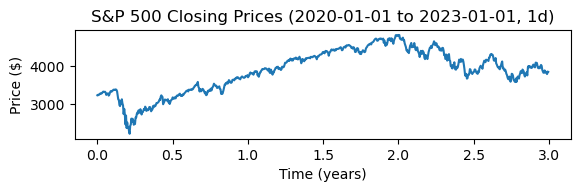

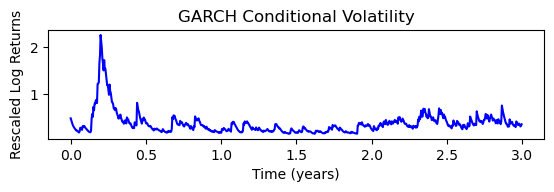

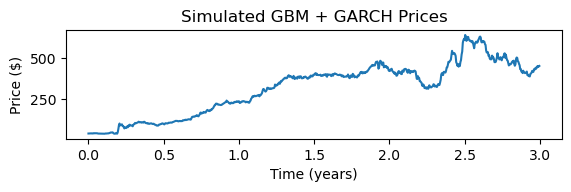

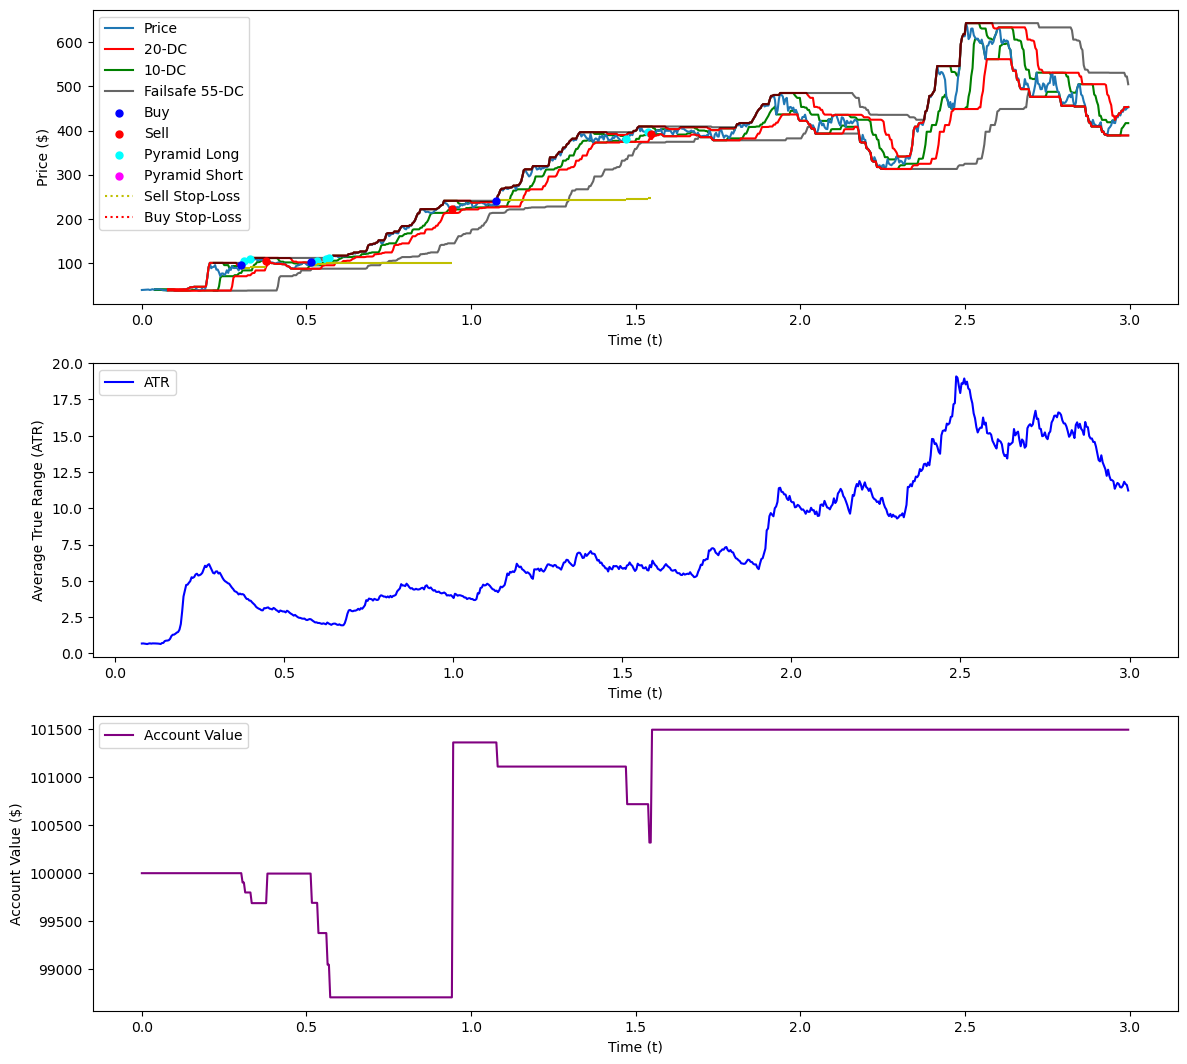

Return after 755 periods: 1.4945 %
Return/MaxDrawdown: 1.1557828952392244


In [19]:
# Set System 1 (GBM + GARCH) Parameters

# GARCH parameters
p = 1                          # order of lagged conditional variances (effect of past variances on current variance)
q = 1                          # order of lagged squared errors (effect of past errors on current variance)
stock = '^GSPC'                # S&P 500 YahooFinance ticker symbol
start = "2020-01-01"           # S&P 500 Closing Price Start Date
end = "2023-01-01"             # S&P 500 Closing Price End Date
interval = "1d"                # S&P 500 Closing Price Interval
garch_params = [p, q, stock, start, end, interval]

# GBM Path Parameters
mu = 0.5                       # GBM drift using the conditional 
S0 = 40                        # Starting simulated price
prices_per_n = 4               # Intraperiod price points (for calculation of Open, High, Close, Low)
path_params = [mu, S0, prices_per_n]

# Strategy Parameters
initial_account_size = 100000     # Starting account balance
entry_breakout_period = 20        # Lookback period of entry Donchian Channel
exit_breakout_period = 10         # Lookback period of exit Donchian Channel
failsafe_breakout_period = 55     # Lookback period of entry Donchian Channel of last resort (if last trade was skipped)
exposure = 0.01                   # Risk Exposure: percent of account equity leveraged for a unit, scaled by ATR
big_point_value = 1               # Dollar value of contract
slippage_period = 1               # Lookforward period for the worst price
trans_fee = 10                    # Flat transaction fee
strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]

# Instantiate and Run the System 1 (GBM + GARCH) Simulation
sys1_garch = sim_sys1_garch()
sys1_garch.train_garch(garch_params)
sys1_garch.sim_stochastic(path_params)
sys1_garch.sim_strategy(strategy_params, debug=False)    # debug=True to print full transaction log

print("Return after", len(sys1_garch.close), "periods:", np.round((sys1_garch.account_evolution[-1]/initial_account_size-1)*100,4), "%")
print("Return/MaxDrawdown:", (sys1_garch.account_evolution[-1]/initial_account_size-1) / (1-np.min(sys1_garch.account_evolution)/initial_account_size))

The difference between this and previous simulations lies primarily in the calculation and behaviour of the GBM price path, now constructed with a set of time-varying conditional volatilities. We can observe the emergence of distinct volatility clusters or congregation of similar price changes. Just as in the case of constant percentage volatility, the effect of high time-varying volatility are often dampened when the price level is low, as the conditional volatilites are still being processed by the GBM formulation as percentage volatility. However, with time-varying percentage volatilities, absolute volatility can occur even when the price level is low, provided that the estimated conditional volatilities for those time periods are sufficiently high. Similarly, we see fewer consistent trends in ATR, even when percentage drift is high in absolute value. 

### III. ii. System 2 with GBM + GARCH Prices

In [20]:
# Define System 2 (GBM + GARCH) Simulation Object

class sim_sys2_garch():
    def __init__(self):
        #Path attributes
        self.path_params = None
        self.path = None
        self.open = None
        self.close = None
        self.high = None
        self.low = None
        
        #Strategy attributes
        self.account_evolution = None
        self.profit = None
        self.cond_vol = None
        self.real_closes = None
        self.stock_dates = None
        self.num_trans = 0

    def train_garch(self, garch_params):
        ''' Fit GARCH model on S&P 500 Closing Prices'''
        p, q, stock, start, end, interval = garch_params
        self.stock_dates = [start, end, interval]
        
        #Download historical price data for S&P500 index
        data = yf.download(stock, start=start, end=end, progress=False, interval=interval)
        self.real_closes = data['Close']
        
        #Fit the GARCH model on log returns
        log_returns = np.log(data['Close'].pct_change()+1) 
        log_returns.dropna(inplace=True)
        model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)       # Rescale for better fit
        self.cond_vol = model.fit(disp='off').conditional_volatility / model.scale * np.sqrt(len(log_returns))      # Unscale and annualize
        
    def sim_stochastic(self, path_params, plot=True):
        ''' Generate syntehtic price data using GBM and time-varying GARCH volatility '''
        mu, S0, prices_per_n = path_params 
        start, end, interval = self.stock_dates
        
        n = len(self.cond_vol) 
        T = n / 252              
        dt = T / (prices_per_n*n)
        t = np.linspace(0, T, n)   
        self.path_params = mu, S0, prices_per_n, n, t 
    
        #Generate GBM prices
        extended_vol = np.repeat(self.cond_vol, prices_per_n)
        St = np.exp(
            (mu - extended_vol**2/2)*dt
            + extended_vol * np.random.normal(0, np.sqrt(dt), size=(prices_per_n*n))) #Account for high, low, open, and close
        St = np.array(S0*St.cumprod())
        
        self.path = St
        self.open = St[0::prices_per_n]
        self.close = St[prices_per_n-1::prices_per_n]
        St_reshaped = St.reshape(-1, prices_per_n)
        self.high = np.max(St_reshaped, axis=1)
        self.low = np.min(St_reshaped, axis=1)
    
        # Plot GARCH data and generated paths
        if plot==True:
            plt.subplot(3,1,1)
            plt.plot(t, self.real_closes[1:])
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.title(f"S&P 500 Closing Prices ({start} to {end}, {interval})")
            plt.show()
            
            plt.subplot(3,1,2)
            plt.plot(t, self.cond_vol, "b")
            plt.xlabel("Time (years)")
            plt.ylabel("Rescaled Log Returns")
            plt.title("GARCH Conditional Volatility")
            plt.show()
            
            plt.subplot(3,1,1)
            plt.plot(t, self.close)
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.title("Simulated GBM + GARCH Prices")
            plt.show()
            
    def sim_strategy(self, strategy_params, plot=True, debug=False):
        ''' Implement System 2 on GBM + GARCH Prices Data'''
        initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee = strategy_params
        mu, S0, prices_per_n, n, t  = self.path_params
        
        # Initialize Donchian Channels
        long_entry_channel = np.full_like(self.close, np.nan)
        long_exit_channel = np.full_like(self.close, np.nan)
        short_entry_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        
        # Initialize Stop Loss
        sell_stop_loss = np.full_like(self.close, np.nan)
        buy_stop_loss = np. full_like(self.close, np.nan)
        
        # Initialize Signals
        buy_signal = np.full_like(self.close, np.nan)
        sell_signal = np.full_like(self.close, np.nan)
        pyramid_buy_signal = np.full_like(self.close, np.nan)
        pyramid_sell_signal = np.full_like(self.close, np.nan)

        # Initialize Volatility Variables
        TR = np.full_like(self.close, np.nan)
        ATR = np.full_like(self.close, np.nan)
        TR2 = np.full_like(self.close, np.nan)
        ATR2 = np.full_like(self.close, np.nan)

        # Initialize Account Variables
        profit = np.full_like(self.close, np.nan)
        account_size = np.full_like(self.close, initial_account_size)
    
        # Initialize States
        hold_position = None         #"Long", "Short", or None
        num_units = 0
        total_shares = 0
        total_cost = 0
        total_revenue = 0 
        
        ## Begin the simulation:
        for i in range(n):
            
            # Calculate Donchian Channels (DC)
            if i >= entry_breakout_period:
                long_entry_channel[i] = np.max(self.close[i-entry_breakout_period:i+1])
                short_entry_channel[i] = np.min(self.close[i-entry_breakout_period:i+1])
            if i >= exit_breakout_period:
                long_exit_channel[i] = np.min(self.close[i-exit_breakout_period:i+1])
                short_exit_channel[i] = np.max(self.close[i-exit_breakout_period:i+1])
            
            # Calculate True Range (TR)
            if i > 0:
                TR[i] = max(self.high[i] - self.low[i], np.abs(self.high[i] - self.close[i-1]), np.abs(self.low[i] - self.close[i-1])) #np.max()
            
            # Calculate Average True Range (ATR)
            if i == 20:
                ATR[i] = np.mean(TR[i-20+1:i+1])
            elif i > 20:
                ATR[i] = (ATR[i-1]*(20-1) + TR[i]) / 20

            # "Burn in" simulation: delay trading until indicators take on real values
            if i < max(entry_breakout_period, exit_breakout_period):
                continue
            
        ## Begin trading:
            #Long Entry
            if hold_position==None and self.close[i] > long_entry_channel[i-1]:
                long_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else:
                    hold_position = "Long"
                    buy_signal[i] = self.close[i]

                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    sell_stop_loss[i:] = buy_price - 2*ATR[i]
                    initial_sell_stop = sell_stop_loss[i]
                    initial_long_ATR = ATR[i]
                    total_shares += long_shares
                    total_cost += cost 
                    num_units += 1
                    
                    if debug==True:
                        print("LONG ENTRY ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            #Pyramid Long
            elif hold_position=="Long" and num_units < 4 and self.close[i] > buy_price + 0.5*initial_long_ATR:
                long_unit = min(max(0,long_unit + 0.5*initial_long_ATR), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else: 
                    pyramid_buy_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    initial_sell_stop = initial_sell_stop + 0.5 * initial_long_ATR
                    sell_stop_loss[i:] = initial_sell_stop
                    total_shares += long_shares
                    total_cost += cost
                    num_units += 1
                    
                    if debug==True:
                        print("LONG PYRAMID ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            #Long Exit
            elif hold_position=="Long" and (self.close[i] <= sell_stop_loss[i-1] or self.close[i] < long_exit_channel[i-1]):                      
                hold_position = None
                sell_signal[i] = self.close[i]
                
                #Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                else:
                    sell_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                revenue = total_shares * sell_price
                account_size[i+1:] = account_size[i] + revenue
                profit[i] = revenue - total_cost
                sell_stop_loss[i:] = np.nan
                    
                if debug==True:
                    print("LONG EXIT ( t=", i/n*T,")")
                    print("Shares Sold:", total_shares)
                    print("Sell Price:", sell_price)
                    print("Actual Price:", self.close[i])
                    print("Revenue:", revenue)
                    print("Total Cost:", total_cost)
                    print("profit:", profit[i])
                    print("______________________")
                    
                total_cost = 0
                total_shares = 0 
                num_units = 0

            #Short Entry
            elif hold_position==None and self.close[i] < short_entry_channel[i-1]:
                short_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares == 0:
                    continue
                else:
                    hold_position = "Short"
                    sell_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    buy_stop_loss[i:] = sell_price + 2*ATR[i]
                    initial_buy_stop = buy_stop_loss[i]
                    initial_short_ATR = ATR[i]
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                                    
                    if debug==True:
                        print("SHORT ENTRY ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            #Pyramid Short
            elif hold_position=="Short" and num_units < 4 and self.close[i] < sell_price - 0.5*initial_short_ATR:
                short_unit = min(max(0,short_unit + 0.5*initial_short_ATR), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares==0:
                    continue
                else: 
                    pyramid_sell_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    initial_buy_stop = initial_buy_stop - 0.5 * initial_short_ATR
                    buy_stop_loss[i:] = initial_buy_stop
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                    
                    if debug==True:
                        print("SHORT PYRAMID ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            #Short Exit
            elif hold_position=="Short" and (self.close[i] >= buy_stop_loss[i-1] or self.close[i] > short_exit_channel[i-1]):                     
                hold_position = None
                buy_signal[i] = self.close[i]
    
                #Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                else:
                    buy_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                cost = total_shares * buy_price
                profit[i] = total_revenue - cost
                account_size[i+1:] = account_size[i] + profit[i]
                buy_stop_loss[i:] = np.nan 
                
                if debug==True:
                    print("SHORT EXIT ( t=", i/n*T,")")
                    print("Shares Bought:", total_shares)
                    print("Buy Price:", buy_price)
                    print("Actual Price:", self.close[i])
                    print("Cost:", cost)
                    print("Total Revenue:", total_revenue)
                    print("profit:", profit[i])
                    print("______________________")
                
                total_shares=0
                total_revenue=0
                num_units=0
                    
        ## Close all active positions in the final period
        if hold_position=="Long":
            sell_price = self.close[-1]
            sell_signal[-1] = self.close[-1]
            revenue = total_shares * sell_price
            profit[-1] = revenue - total_cost
            account_size[-1] = account_size[-2] + revenue 
        elif hold_position=="Short":
            buy_price = self.close[-1]
            buy_signal[-1] = self.close[-1]
            cost = total_shares * buy_price
            profit[-1] = total_revenue - cost
            account_size[-1] = account_size[-2] + profit[-1]
        
        ## Update account statistics
        self.account_evolution = account_size
        self.profit = profit
        self.num_trans = np.sum(~np.isnan(buy_signal))
            
        ## Optional: plot Price, ATR, and Equity Curve
        if plot==True:
            plt.figure(figsize=(14,12))
            
            # Plot Trades
            plt.subplot(3,1,1)
            plt.plot(t, self.close, label="Price")
            plt.plot(t, long_entry_channel+0.0025*S0, 'r', label=f"{entry_breakout_period}-DC", zorder=2)
            plt.plot(t, long_exit_channel, 'g', label=f"{exit_breakout_period}-DC", zorder=1)
            plt.plot(t, short_entry_channel-0.0025*S0, 'r', zorder=2)
            plt.plot(t, short_exit_channel, 'g', zorder=1)
            plt.scatter(t, buy_signal, color='b', label="Buy", zorder=3, s=25)
            plt.scatter(t, sell_signal, color='r', label="Sell", zorder=3, s=25)
            plt.scatter(t, pyramid_buy_signal, color="cyan", label="Pyramid Long", zorder=2, s=25)
            plt.scatter(t, pyramid_sell_signal, color="magenta", label="Pyramid Short", zorder=2, s=25)
            
            # Plot Stop Loss Levels
            for i in range(n-1):
                if not np.isnan(sell_stop_loss[i]):
                    plt.hlines(sell_stop_loss[i], t[i], t[i+1], color="y", linestyle="dotted", zorder=2)
                if not np.isnan(buy_stop_loss[i]):
                    plt.hlines(buy_stop_loss[i], t[i], t[i+1], color="r", linestyle="dotted", zorder= 2)
            plt.plot([], color="y", linestyle="dotted", label="Sell Stop-Loss")
            plt.plot([], color="r", linestyle="dotted", label="Buy Stop-Loss")
            plt.xlabel("Time (yrs)")
            plt.ylabel("Price ($)")
            plt.legend(loc="upper left")

            # PLot ATR
            plt.subplot(3,1,2)
            plt.plot(t, ATR, 'b', label="ATR")
            plt.xlabel("Time (yrs)")
            plt.ylabel("Average True Range (ATR)")
            plt.legend(loc="upper left")
            
            # Plot Equity Curve
            plt.subplot(3,1,3)
            plt.plot(t, self.account_evolution, color="purple", label="Account Value")
            plt.xlabel("Time (yrs)")
            plt.ylabel("Account Value ($)")
            plt.legend(loc="upper left")

            plt.show()

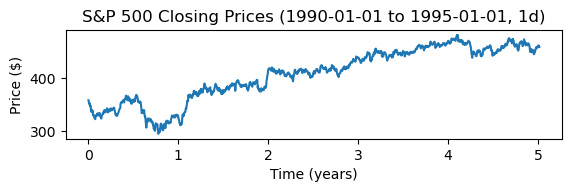

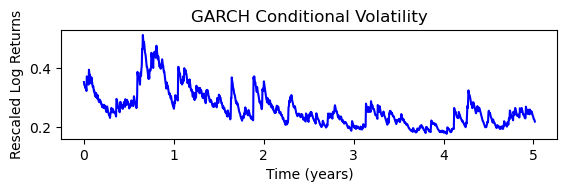

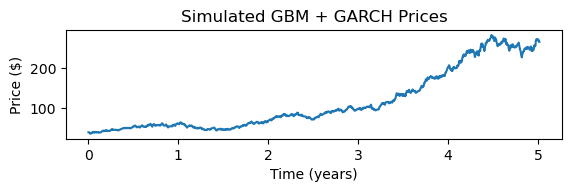

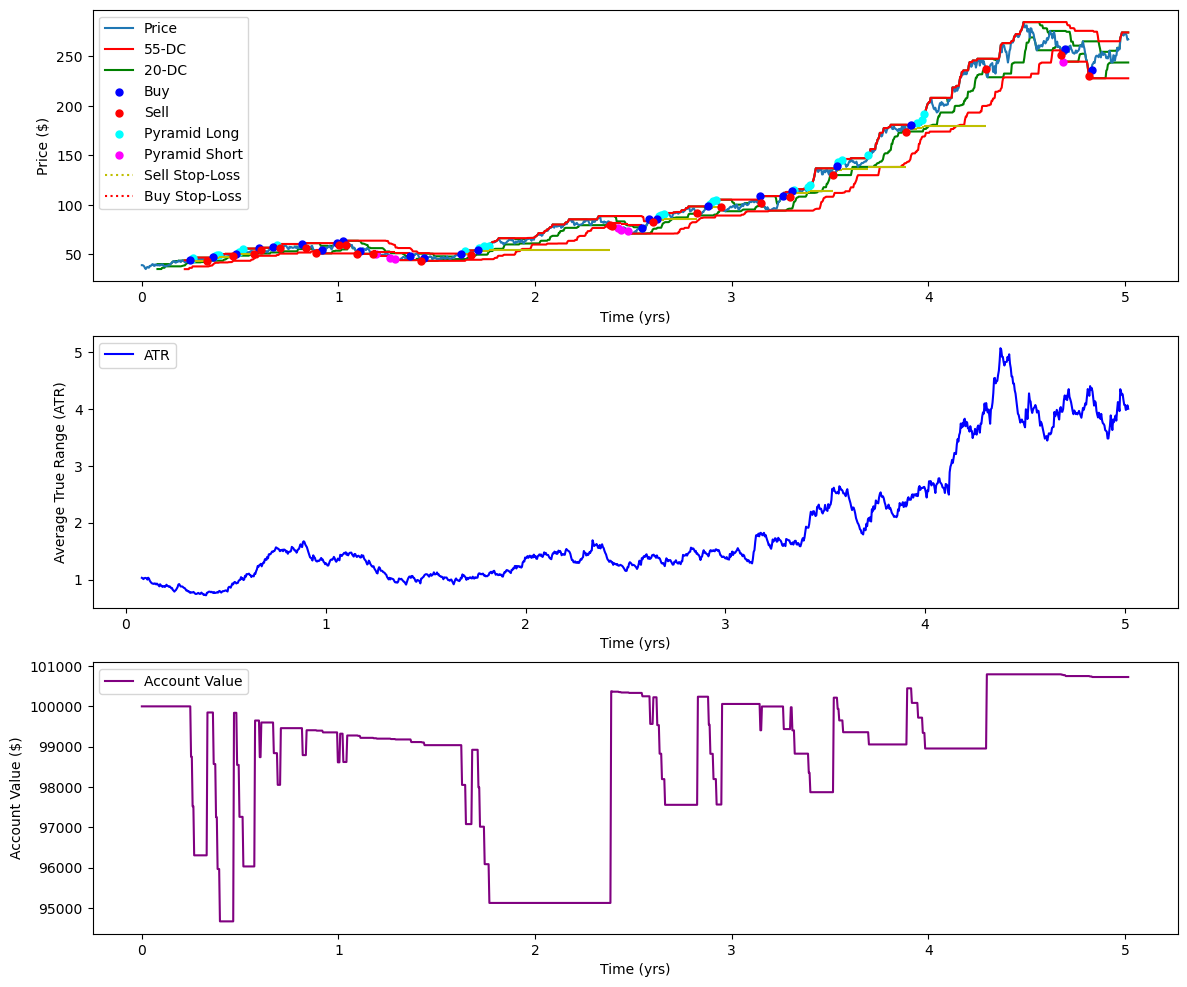

Return after 1264 periods: 0.7281 %
Return/MaxDrawdown: 0.13652950373275305


In [21]:
# Set System 2 (GBM + GARCH) Parameters

# GARCH parameters
p = 1     
q = 1      
stock = '^GSPC'              
start = "1990-01-01"
end = "1995-01-01"
interval = "1d"
garch_params = [p, q, stock, start, end, interval]

# GBM Path parameters
mu = 0.5              
S0 = 40                     
prices_per_n = 4     
path_params = [mu, S0, prices_per_n]

# Strategy Parameters
initial_account_size = 100000  
entry_breakout_period = 55      
exit_breakout_period = 20         
exposure = 0.01                
big_point_value = 1             
slippage_period = 1           
trans_fee = 10            
strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]

# Instantiate and Run System 2 (GBM + GARCH) Simulation
sys2_garch = sim_sys2_garch()
sys2_garch.train_garch(garch_params)
sys2_garch.sim_stochastic(path_params)
sys2_garch.sim_strategy(strategy_params, debug=False)

print("Return after", len(sys2_garch.close), "periods:", np.round((sys2_garch.account_evolution[-1]/initial_account_size-1)*100,4), "%")
print("Return/MaxDrawdown:", (sys2_garch.account_evolution[-1]/initial_account_size-1) / (1-np.min(sys2_garch.account_evolution)/initial_account_size))

### III. iii. Monte Carlo 4: Comparing System 1 and System 2 with GBM and GBM + GARCH.

Having incorporated GARCH into the simulation modelling objects of both systems, we now seek avenues for comparing the aggregate performance of the Turtle Trading System, with and without dynamic percentage volatility. However, in order to make a fair comparison, we require a method to collapse the time-varying volatilities generated in the GBM + GARCH models into a single, static percentage volatility parameter, $\sigma$. At the risk of losing some accuracy, we will adopt the simplifying assumption that the aggregated annualized volatility is equal to the arithmetic mean of the annualized conditional volatilities (equivalent to annualizing the mean of the conditional volatilities), reflecting the additive nature of log returns. However, the resulting aggregated $\sigma$ likely overestimates the central measure of monthly volatilities, particularly when these volatilities are positively correlated within volatility clusters. In order to mitigate some of this bias, we will also report the performance of the GBM systems when their percent volatility is calculated with the geometric mean of the conditional volatilities; nonetheless, we caution readers to consider the following comparison judiciously.

To avoid repeatedly sampling the volatility patterns of certain S&P 500 time periods, we will generate random start and end dates between 1995 and 2023, roughly 1 or 2 years apart. We adjust the interval between start and end dates by adding trading days to the end date according to the systems' burn-in times and Donchian channel breakout periods.

In [22]:
# Generate random start and end dates, between 1 and 2 years apart, in the range of 1990 and 2023

# initialize storage arrays
sys1_dates = []
ex_sys1_dates = []
sh_sys1_dates = []

sys2_dates = []
ex_sys2_dates = []
sh_sys2_dates = []

P = 200 # Number of paths sampled

for i in range(P):
    start_date = datetime.strptime('1995-01-01', '%Y-%m-%d')
    end_date = datetime.strptime('2020-01-01', '%Y-%m-%d')

    # Generate random start date
    rnd_start_date = start_date + timedelta(
        seconds=random.randint(0, int((end_date - start_date).total_seconds())))
    rnd_start_date_str = rnd_start_date.strftime('%Y-%m-%d')
    
    # Generate a random end date, 1-2 years from the start date
    rnd_years = timedelta(days=random.randint(1,2)*365.25)
    rnd_end_date = rnd_start_date + rnd_years

   ## Adjust for burn-in time, and number of trading days in a year
    # System 1
    adj = rnd_end_date + timedelta(days=(55*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    sys1_dates.append((rnd_start_date_str, rnd_end_date_str))
       
    # Extended System 1
    adj = rnd_end_date + timedelta(days=(100*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    ex_sys1_dates.append((rnd_start_date_str, rnd_end_date_str))

    # Shortened System 1
    adj = rnd_end_date + timedelta(days=(20*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    sh_sys1_dates.append((rnd_start_date_str, rnd_end_date_str))
                      
    # System 2
    adj = rnd_end_date + timedelta(days=(55*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    sys2_dates.append((rnd_start_date_str, rnd_end_date_str))
       
    # Extended System 2
    adj = rnd_end_date + timedelta(days=(70*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    ex_sys2_dates.append((rnd_start_date_str, rnd_end_date_str))

    # Shortened System 2
    adj = rnd_end_date + timedelta(days=(20*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    sh_sys2_dates.append((rnd_start_date_str, rnd_end_date_str))         

In [25]:
#  Monte Carlo 4: Comparing System 1 and System 2 with GBM and GBM + GARCH. 
# (WARNING: LONG SIMULATION TIME)!!! #

# Initialize storage arrays
sys1_returns = np.array([])
sys1_garch_returns = np.array([])
sys1_num_trans = np.array([])
sys1_garch_num_trans = np.array([])
sys1_geo = np.array([])

sh_sys1_returns = np.array([])
sh_sys1_garch_returns = np.array([])
sh_sys1_num_trans = np.array([])
sh_sys1_garch_num_trans = np.array([])
sh_sys1_geo = np.array([])

ex_sys1_returns = np.array([])
ex_sys1_garch_returns = np.array([])
ex_sys1_num_trans = np.array([])
ex_sys1_garch_num_trans = np.array([])
ex_sys1_geo = np.array([])

sys2_returns = np.array([])
sys2_garch_returns = np.array([])
sys2_num_trans = np.array([])
sys2_garch_num_trans = np.array([])
sys2_geo = np.array([])

ex_sys2_returns = np.array([])
ex_sys2_garch_returns = np.array([])
ex_sys2_num_trans = np.array([])
ex_sys2_garch_num_trans = np.array([])
ex_sys2_geo = np.array([])

sh_sys2_returns = np.array([])
sh_sys2_garch_returns = np.array([])
sh_sys2_num_trans = np.array([])
sh_sys2_garch_num_trans = np.array([])
sh_sys2_geo = np.array([])

# Set constant parameters and counter
p = 1    
q = 1   
stock = '^GSPC'              
interval = "1d"
initial_account_size = 100000  
exposure = 0.01                   
big_point_value = 1               
slippage_period = 1              
trans_fee = 10
S0 = 100  
prices_per_n = 4
counter = 0 

for j in range(P):
    
    # Path Parameters
    mu = np.random.rand()*2-1    # -1 < mu < 1
    
#--------------System 1--------------
    # Breakout periods
    entry_breakout_period = 20   
    exit_breakout_period = 10
    failsafe_breakout_period = 55
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
    
    # System 1 (GBM + GARCH) returns
    sys1_garch = sim_sys1_garch()
    start = sys1_dates[j][0]
    end = sys1_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    sys1_garch.train_garch(garch_params)
    #S0 = sys1_garch.real_closes[0]        #Optional line: initializes price at S&P 500 starting price
    path_params = [mu, S0, prices_per_n]
    sys1_garch.sim_stochastic(path_params, plot=False)
    sys1_garch.sim_strategy(strategy_params, plot=False)
    returns = (sys1_garch.account_evolution[-1]/initial_account_size-1)*100
    sys1_garch_returns = np.append(sys1_garch_returns, returns)
    sys1_garch_num_trans = np.append(sys1_garch_num_trans, sys1_garch.num_trans)
    
    # System 1 (GBM) returns
    n = len(sys1_garch.close)
    sigma = np.mean(sys1_garch.cond_vol) 
    path_params = [mu, sigma, S0, n, prices_per_n]
    sys1 = sim_system1()
    sys1.sim_stochastic(path_params, plot=False)
    sys1.sim_strategy(strategy_params, plot=False)
    returns = (sys1.account_evolution[-1]/initial_account_size-1)*100
    sys1_returns = np.append(sys1_returns, returns)
    sys1_num_trans = np.append(sys1_num_trans, sys1.num_trans)
    
    sigma = geometric_mean(sys1_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    sys1 = sim_system1()
    sys1.sim_stochastic(path_params, plot=False)
    sys1.sim_strategy(strategy_params, plot=False)
    returns = (sys1.account_evolution[-1]/initial_account_size-1)*100
    sys1_geo = np.append(sys1_geo, returns)
    
#---------------------Extended System 1---------------------
    # Breakout periods
    entry_breakout_period = 55   
    exit_breakout_period = 20
    failsafe_breakout_period = 100
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]

    # Extended System 1 (GBM + GARCH) returns
    ex_sys1_garch = sim_sys1_garch()
    start = ex_sys1_dates[j][0]
    end = ex_sys1_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    ex_sys1_garch.train_garch(garch_params)
    #S0 = ex_sys1_garch.real_closes[0] 
    path_params = [mu, S0, prices_per_n]
    ex_sys1_garch.sim_stochastic(path_params, plot=False)
    ex_sys1_garch.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys1_garch.account_evolution[-1]/initial_account_size-1)*100
    ex_sys1_garch_returns = np.append(ex_sys1_garch_returns, returns)
    ex_sys1_garch_num_trans = np.append(ex_sys1_garch_num_trans, ex_sys1_garch.num_trans)

    # Extended System 1 (GBM) returns
    n = len(ex_sys1_garch.close)
    sigma = np.mean(ex_sys1_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    ex_sys1 = sim_system1()
    ex_sys1.sim_stochastic(path_params, plot=False)
    ex_sys1.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys1.account_evolution[-1]/initial_account_size-1)*100
    ex_sys1_returns = np.append(ex_sys1_returns, returns)
    ex_sys1_num_trans = np.append(ex_sys1_num_trans, ex_sys1.num_trans)
    
    sigma = geometric_mean(ex_sys1_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    ex_sys1 = sim_system1()
    ex_sys1.sim_stochastic(path_params, plot=False)
    ex_sys1.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys1.account_evolution[-1]/initial_account_size-1)*100
    ex_sys1_geo = np.append(ex_sys1_geo, returns)

#---------------------Shortened System 1---------------------
    # Breakout periods
    entry_breakout_period = 10   
    exit_breakout_period = 5
    failsafe_breakout_period = 20
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, failsafe_breakout_period, exposure, big_point_value, slippage_period, trans_fee]

    # Shortened System 1 (GBM + GARCH) returns
    sh_sys1_garch = sim_sys1_garch()
    start = sh_sys1_dates[j][0]
    end = sh_sys1_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    sh_sys1_garch.train_garch(garch_params)
    #S0 = sh_sys1_garch.real_closes[0] 
    path_params = [mu, S0, prices_per_n]
    sh_sys1_garch.sim_stochastic(path_params, plot=False)
    sh_sys1_garch.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys1_garch.account_evolution[-1]/initial_account_size-1)*100
    sh_sys1_garch_returns = np.append(sh_sys1_garch_returns, returns)
    sh_sys1_garch_num_trans = np.append(sh_sys1_garch_num_trans, sh_sys1_garch.num_trans)

    # Shortened System 1 (GBM) returns
    n = len(sh_sys1_garch.close)
    sigma = np.mean(sh_sys1_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    sh_sys1 = sim_system1()
    sh_sys1.sim_stochastic(path_params, plot=False)
    sh_sys1.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys1.account_evolution[-1]/initial_account_size-1)*100
    sh_sys1_returns = np.append(sh_sys1_returns, returns)
    sh_sys1_num_trans = np.append(sh_sys1_num_trans, sh_sys1.num_trans)
    
    sigma = geometric_mean(sh_sys1_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    sh_sys1 = sim_system1()
    sh_sys1.sim_stochastic(path_params, plot=False)
    sh_sys1.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys1.account_evolution[-1]/initial_account_size-1)*100
    sh_sys1_geo = np.append(sh_sys1_geo, returns)
    
#---------------------System 2---------------------
    # Breakout periods
    entry_breakout_period = 55   
    exit_breakout_period = 20
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
   
    # System 2 (GBM + GARCH) returns
    sys2_garch = sim_sys2_garch()
    start = sys2_dates[j][0]
    end = sys2_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    sys2_garch.train_garch(garch_params)
    #S0 = sys2_garch.real_closes[0] 
    path_params = [mu, S0, prices_per_n]
    sys2_garch.sim_stochastic(path_params, plot=False)
    sys2_garch.sim_strategy(strategy_params, plot=False)
    returns = (sys2_garch.account_evolution[-1]/initial_account_size-1)*100
    sys2_garch_returns = np.append(sys2_garch_returns, returns)
    sys2_garch_num_trans = np.append(sys2_garch_num_trans, sys2_garch.num_trans)

    # System 2 (GBM) returns
    n = len(sys2_garch.close)
    sigma = np.mean(sys2_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    sys2 = sim_system2()
    sys2.sim_stochastic(path_params, plot=False)
    sys2.sim_strategy(strategy_params, plot=False)
    returns = (sys2.account_evolution[-1]/initial_account_size-1)*100
    sys2_returns = np.append(sys2_returns, returns)
    sys2_num_trans = np.append(sys2_num_trans, sys2.num_trans)
    
    sigma = geometric_mean(sys2_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    sys2 = sim_system2()
    sys2.sim_stochastic(path_params, plot=False)
    sys2.sim_strategy(strategy_params, plot=False)
    returns = (sys2.account_evolution[-1]/initial_account_size-1)*100
    sys2_geo = np.append(sys2_geo, returns)
    
#---------------------Extended System 2---------------------
    # Breakout periods
    entry_breakout_period = 70   
    exit_breakout_period = 45
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
   
    # Extended System 2 (GBM + GARCH) returns
    ex_sys2_garch = sim_sys2_garch()
    start = ex_sys2_dates[j][0]
    end = ex_sys2_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    ex_sys2_garch.train_garch(garch_params)
    #S0 = ex_sys2_garch.real_closes[0] 
    path_params = [mu, S0, prices_per_n]
    ex_sys2_garch.sim_stochastic(path_params, plot=False)
    ex_sys2_garch.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys2_garch.account_evolution[-1]/initial_account_size-1)*100
    ex_sys2_garch_returns = np.append(ex_sys2_garch_returns, returns)
    ex_sys2_garch_num_trans = np.append(ex_sys2_garch_num_trans, ex_sys2_garch.num_trans)
    
    # Extended System 2 (GBM) returns
    n = len(ex_sys2_garch.close)
    sigma = np.mean(ex_sys2_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    ex_sys2 = sim_system2()
    ex_sys2.sim_stochastic(path_params, plot=False)
    ex_sys2.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys2.account_evolution[-1]/initial_account_size-1)*100
    ex_sys2_returns = np.append(ex_sys2_returns, returns)
    ex_sys2_num_trans = np.append(ex_sys2_num_trans, ex_sys2.num_trans)
    
    sigma = geometric_mean(ex_sys2_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    ex_sys2 = sim_system2()
    ex_sys2.sim_stochastic(path_params, plot=False)
    ex_sys2.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys2.account_evolution[-1]/initial_account_size-1)*100
    ex_sys2_geo = np.append(ex_sys2_geo, returns)
    
#---------------------Shortened System 2---------------------
    # Breakout periods
    entry_breakout_period = 20   
    exit_breakout_period = 10
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
   
    # Shortened System 2 (GBM + GARCH) returns
    sh_sys2_garch = sim_sys2_garch()
    start = sh_sys2_dates[j][0]
    end = sh_sys2_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    sh_sys2_garch.train_garch(garch_params)
    #S0 = sh_sys2_garch.real_closes[0] 
    path_params = [mu, S0, prices_per_n]
    sh_sys2_garch.sim_stochastic(path_params, plot=False)
    sh_sys2_garch.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys2_garch.account_evolution[-1]/initial_account_size-1)*100
    sh_sys2_garch_returns = np.append(sh_sys2_garch_returns, returns)
    sh_sys2_garch_num_trans = np.append(sh_sys2_garch_num_trans, sh_sys2_garch.num_trans)
    
    # Shortened System 2 (GBM) returns
    n = len(sh_sys2_garch.close)
    sigma = np.mean(sh_sys2_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    sh_sys2 = sim_system2()
    sh_sys2.sim_stochastic(path_params, plot=False)
    sh_sys2.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys2.account_evolution[-1]/initial_account_size-1)*100
    sh_sys2_returns = np.append(sh_sys2_returns, returns)
    sh_sys2_num_trans = np.append(sh_sys2_num_trans, sh_sys2.num_trans)
    
    sigma = geometric_mean(sh_sys2_garch.cond_vol)
    path_params = [mu, sigma, S0, n, prices_per_n]
    sh_sys2 = sim_system2()
    sh_sys2.sim_stochastic(path_params, plot=False)
    sh_sys2.sim_strategy(strategy_params, plot=False)
    returns = (sh_sys2.account_evolution[-1]/initial_account_size-1)*100
    sh_sys2_geo = np.append(sh_sys2_geo, returns)
    
    counter += 1
    print('\rIteration number: {}'.format(counter), end="")


Iteration number: 18

C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration number: 62

C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration number: 128

C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration number: 200

In [26]:
# Remove extreme outliers
filtered_bin = []
for r in [sys1_returns, sys1_garch_returns, ex_sys1_returns, ex_sys1_garch_returns, sh_sys1_returns, sh_sys1_garch_returns, sys2_returns, sys2_garch_returns, ex_sys2_returns, ex_sys2_garch_returns, sh_sys2_returns, sh_sys2_garch_returns, sys1_geo, ex_sys1_geo, sh_sys1_geo, sys2_geo, ex_sys2_geo, sh_sys2_geo]:
    lower, upper = np.percentile(r, [1,99])
    filtered = r[(r > lower) & (r < upper)]
    filtered_bin.append(filtered)
    
sys1_returns, sys1_garch_returns, ex_sys1_returns, ex_sys1_garch_returns, sh_sys1_returns, sh_sys1_garch_returns, sys2_returns, sys2_garch_returns, ex_sys2_returns, ex_sys2_garch_returns, sh_sys2_returns, sh_sys2_garch_returns, sys1_geo, ex_sys1_geo, sh_sys1_geo, sys2_geo, ex_sys2_geo, sh_sys2_geo = filtered_bin

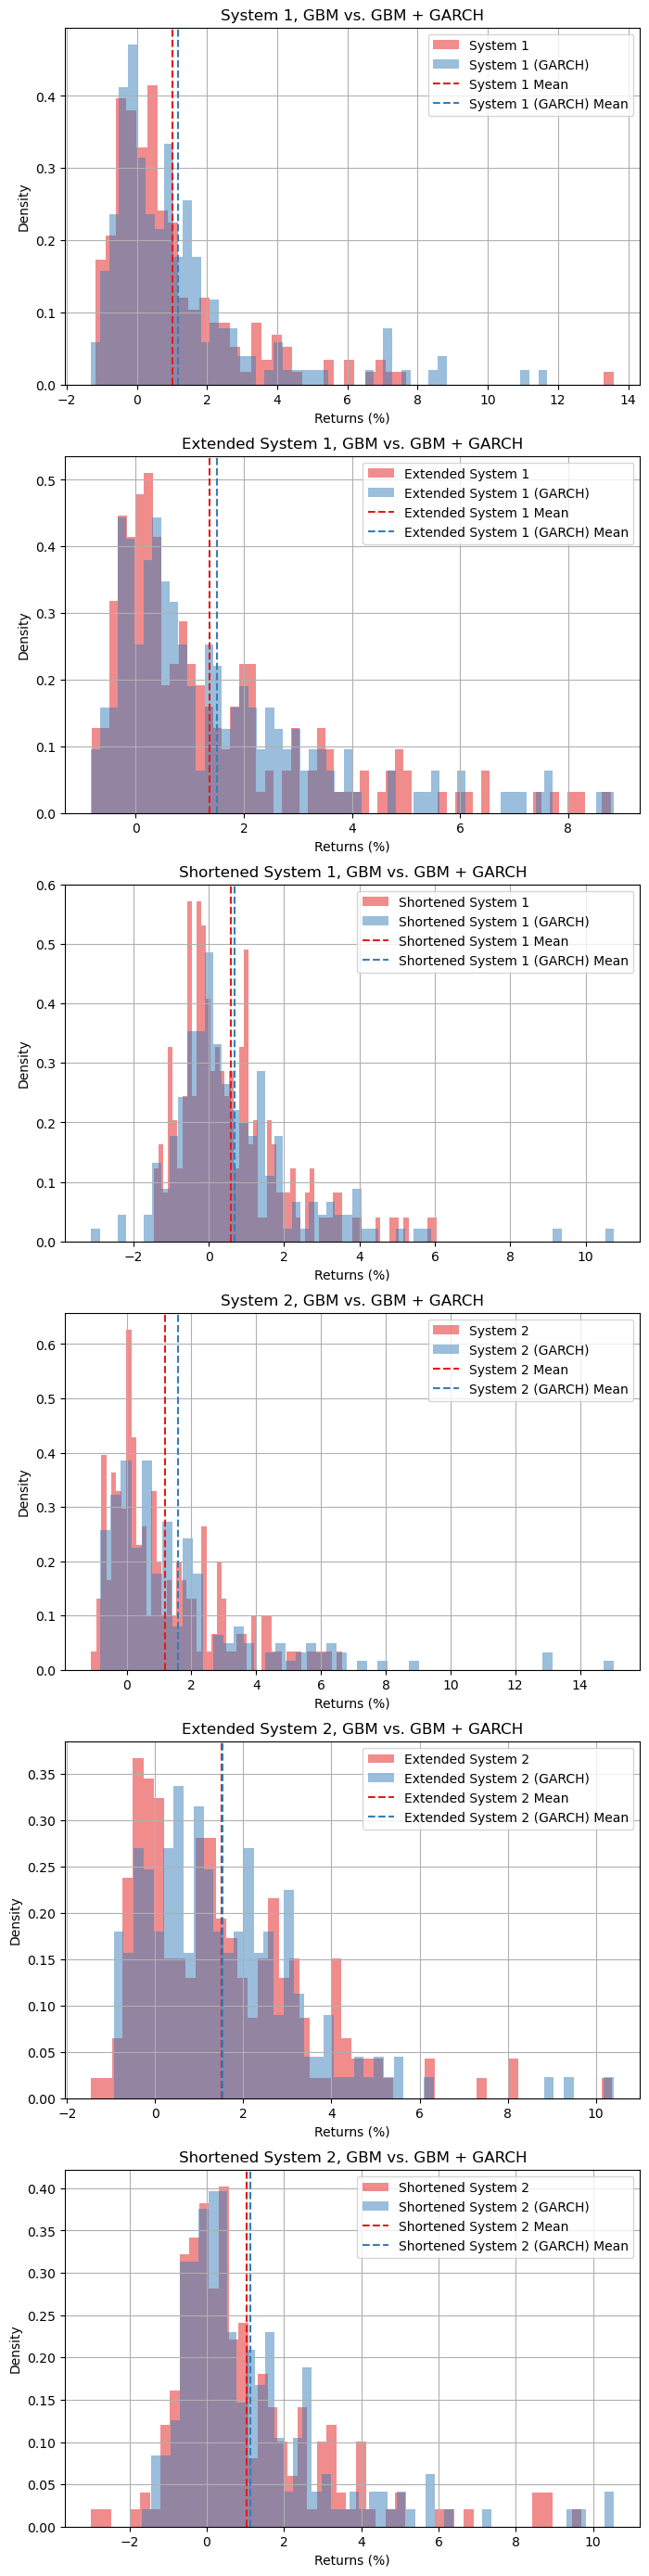

------------- SYSTEM 1 -------------
System 1 Mean: 1.0191554668467095
System 1 Geo Mean: 0.897421741681235
System 1 (GARCH) Mean: 1.164483505177861
System 1 Avg. # of Transactions: 10.97
System 1 (GARCH) Avg. # of Transactions: 10.52

------------- EXTENDED SYSTEM 1 -------------
Extended System 1 Mean: 1.3618259223047828
Extended System 1 Geo Mean: 1.3153370202420593
Extended System 1 (GARCH) Mean: 1.4984489226620685
Extended System 1 Avg. # of Transactions: 6.07
Extended System 1 (GARCH) Avg. # of Transactions: 5.63

------------- SHORTENED SYSTEM 1 -------------
Shortened System 1 Mean: 0.5774886596079818
Shortened System 1 Geo Mean: 0.547206032842811
Shortened System 1 (GARCH) Mean: 0.6930762922924748
Shortened System 1 Avg. # of Transactions: 20.385
Shortened System 1 (GARCH) Avg. # of Transactions: 20.22

------------- SYSTEM 2 -------------
System 2 Mean: 1.1853865786148723
System 2 Geo Mean: 1.3559763900565183
System 2 (GARCH) Mean: 1.5803205498949122
System 2 Avg. # of Transa

In [27]:
# Plot the results 
plt.figure(figsize=(8,35))

# System 1
plt.subplot(6,1,1)
plt.hist(sys1_returns, alpha=0.5, bins=50, label='System 1', color="#e41a1c", density=True)
plt.hist(sys1_garch_returns, alpha=0.5, bins=50, label='System 1 (GARCH)', color="#377eb8", density=True)
plt.axvline(np.mean(sys1_returns), color="#e41a1c", linestyle="--", label="System 1 Mean")
plt.axvline(np.mean(sys1_garch_returns), color="#377eb8", linestyle="--", label="System 1 (GARCH) Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("System 1, GBM vs. GBM + GARCH")
plt.legend()
plt.grid(True)

# Extended System 1
plt.subplot(6,1,2)
plt.hist(ex_sys1_returns, alpha=0.5, bins=60, label='Extended System 1', color="#e41a1c", density=True)
plt.hist(ex_sys1_garch_returns, alpha=0.5, bins=60, label='Extended System 1 (GARCH)', color="#377eb8", density=True)
plt.axvline(np.mean(ex_sys1_returns), color="#e41a1c", linestyle="--", label="Extended System 1 Mean")
plt.axvline(np.mean(ex_sys1_garch_returns), color="#377eb8", linestyle="--", label="Extended System 1 (GARCH) Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("Extended System 1, GBM vs. GBM + GARCH")
plt.legend()
plt.grid(True)

# Shortened System 1
plt.subplot(6,1,3)
plt.hist(sh_sys1_returns, alpha=0.5, bins=60, label='Shortened System 1', color="#e41a1c", density=True)
plt.hist(sh_sys1_garch_returns, alpha=0.5, bins=60, label='Shortened System 1 (GARCH)', color="#377eb8", density=True)
plt.axvline(np.mean(sh_sys1_returns), color="#e41a1c", linestyle="--", label="Shortened System 1 Mean")
plt.axvline(np.mean(sh_sys1_garch_returns), color="#377eb8", linestyle="--", label="Shortened System 1 (GARCH) Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("Shortened System 1, GBM vs. GBM + GARCH")
plt.legend()
plt.grid(True)

# System 2
plt.subplot(6,1,4)
plt.hist(sys2_returns, alpha=0.5, bins=50, label='System 2', color="#e41a1c", density=True)
plt.hist(sys2_garch_returns, alpha=0.5, bins=50, label='System 2 (GARCH)', color="#377eb8", density=True)
plt.axvline(np.mean(sys2_returns), color="#e41a1c", linestyle="--", label="System 2 Mean")
plt.axvline(np.mean(sys2_garch_returns), color="#377eb8", linestyle="--", label="System 2 (GARCH) Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("System 2, GBM vs. GBM + GARCH")
plt.legend()
plt.grid(True)

# Extended System 2
plt.subplot(6,1,5)
plt.hist(ex_sys2_returns, alpha=0.5, bins=50, label='Extended System 2', color="#e41a1c", density=True)
plt.hist(ex_sys2_garch_returns, alpha=0.5, bins=50, label='Extended System 2 (GARCH)', color="#377eb8", density=True)
plt.axvline(np.mean(ex_sys2_returns), color="#e41a1c", linestyle="--", label="Extended System 2 Mean")
plt.axvline(np.mean(ex_sys2_garch_returns), color="#377eb8", linestyle="--", label="Extended System 2 (GARCH) Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("Extended System 2, GBM vs. GBM + GARCH")
plt.legend()
plt.grid(True)

# Shortened System 2
plt.subplot(6,1,6)
plt.hist(sh_sys2_returns, alpha=0.5, bins=50, label='Shortened System 2', color="#e41a1c", density=True)
plt.hist(sh_sys2_garch_returns, alpha=0.5, bins=50, label='Shortened System 2 (GARCH)', color="#377eb8", density=True)
plt.axvline(np.mean(sh_sys2_returns), color="#e41a1c", linestyle="--", label="Shortened System 2 Mean")
plt.axvline(np.mean(sh_sys2_garch_returns), color="#377eb8", linestyle="--", label="Shortened System 2 (GARCH) Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("Shortened System 2, GBM vs. GBM + GARCH")
plt.legend()
plt.grid(True)

plt.show()

# Print statistics
print("------------- SYSTEM 1 -------------")
print("System 1 Mean:", np.mean(sys1_returns))
print("System 1 Geo Mean:", np.mean(sys1_geo))
print("System 1 (GARCH) Mean:", np.mean(sys1_garch_returns))
print("System 1 Avg. # of Transactions:", np.mean(sys1_num_trans))
print("System 1 (GARCH) Avg. # of Transactions:", np.mean(sys1_garch_num_trans))
print()
print("------------- EXTENDED SYSTEM 1 -------------")
print("Extended System 1 Mean:", np.mean(ex_sys1_returns))
print("Extended System 1 Geo Mean:", np.mean(ex_sys1_geo))
print("Extended System 1 (GARCH) Mean:", np.mean(ex_sys1_garch_returns))
print("Extended System 1 Avg. # of Transactions:", np.mean(ex_sys1_num_trans))
print("Extended System 1 (GARCH) Avg. # of Transactions:", np.mean(ex_sys1_garch_num_trans))
print()
print("------------- SHORTENED SYSTEM 1 -------------")
print("Shortened System 1 Mean:", np.mean(sh_sys1_returns))
print("Shortened System 1 Geo Mean:", np.mean(sh_sys1_geo))
print("Shortened System 1 (GARCH) Mean:", np.mean(sh_sys1_garch_returns))
print("Shortened System 1 Avg. # of Transactions:", np.mean(sh_sys1_num_trans))
print("Shortened System 1 (GARCH) Avg. # of Transactions:", np.mean(sh_sys1_garch_num_trans))
print()
print("------------- SYSTEM 2 -------------")
print("System 2 Mean:", np.mean(sys2_returns))
print("System 2 Geo Mean:", np.mean(sys2_geo))
print("System 2 (GARCH) Mean:", np.mean(sys2_garch_returns))
print("System 2 Avg. # of Transactions:", np.mean(sys2_num_trans))
print("System 2 (GARCH) Avg. # of Transactions:", np.mean(sys2_garch_num_trans))
print()
print("------------- EXTENDED SYSTEM 2 -------------")
print("Extended System 2 Mean:", np.mean(ex_sys2_returns))
print("Extended System 2 Geo Mean:", np.mean(ex_sys2_geo))
print("Extended System 2 (GARCH) Mean:", np.mean(ex_sys2_garch_returns))
print("Extended System 2 Avg. # of Transactions:", np.mean(ex_sys2_num_trans))
print("Extended System 2 (GARCH) Avg. # of Transactions:", np.mean(ex_sys2_garch_num_trans))
print()
print("------------- SHORTENED SYSTEM 2 -------------")
print("Shortened System 2 Mean:", np.mean(sh_sys2_returns))
print("Shortened System 2 Geo Mean:", np.mean(sh_sys2_geo))
print("Shortened System 2 (GARCH) Mean:", np.mean(sh_sys2_garch_returns))
print("Shortened System 2 Avg. # of Transactions:", np.mean(sh_sys2_num_trans))
print("Shortened System 2 (GARCH) Avg. # of Transactions:", np.mean(sh_sys2_garch_num_trans))

The above plots show the density distributions of each system for various breakout periods, in the context of GBM and GBM + GARCH prices. We report several statistics: average returns using arithmetic mean volatility, average returns using geometric mean volatility, average returns with time-varying conditional volatilities (GARCH), and the average number of transactions of each system. The geometric mean of the GARCH conditional volatilities is typically less than the arithmetic mean of GARCH conditional volatilities, so the systems simulated with geometric mean volatility face less price variation and noise, which we saw has a negative impact on average returns in previous simulations. Interestingly, there are several results which hold regardless of whether the arithmetic or geometric mean is used to aggregate conditional volatilities. In the case of shortened systems, price paths generated with GBM + GARCH result in higher average returns than those generated with GBM, indicating that time-varying volatility may have a positive effect on systems with short breakout periods. One possible explanation could be that shortened systems are more flexible while transition from one volatility cluster to another or entering and exiting quickly when volatility is changing rapidly. 

In the other direction, increasing the breakout period appeared to make the systems less resilient to time-varying volatility. With GBM + GARCH, extended systems saw lower average returns than their GBM counterparts, perhaps due to their longer memory of extreme prices, and thus slower reaction time to changing market conditions. For example, the Donchian channels may remain wide following periods of rapid volatility expansions, even as the price has settled to a low-volatility trend, preventing the system from exiting or re-entering in a timely manner. 

Interestingly, the extended System 1 with GARCH volatility, armed with its previous breakout classification strategy, increases the average return beyond that of its System 2 benchmark. Previous breakout classification increases performance when winning and losing trades alternate closely, which may be more likely when percent volaitility is alternative between high and low volatility, particularly during a strong trend. Nevertheless, this effect is relatively minor and changes across repetitions of the Monte Carlo simulation. 

## IV. Improving the Turtle Trading System

Throughout this project, we have mainly commented on the deterministic behaviours and stochastic performance of the Turtle Trading System. But along the way, we have occasionally pointed out rules that seemed to hinder the performance of the system in certain simulated price environments. For example, the repeated dominance of the extended Donchian channels imply that the system may be made more robust to non-trending breakout signals. Or, that extending the stop-loss levels in System 2 may make it more resilient to whipsaw. We will redefine the System 2 modelling object, modifying certain strategies and implementing amendments propsoed by other traders, such as an additional Moving Average Convergence-Divergence (MACD) entry rule.$^{9}$ We will then benchmark our "System 3" on the regular and extended System 2 to see whether these modifications are able to improve the performance of the Turtle Trading Strategy in the simulated GBM + GARCH price environment. The modifications include:

1. __Remove Previous Trade Classification:__ leads to lower average return in GBM, and provides similar returns in GBM + GARCH.
2. __Extend Breakout Channels:__ Switch to (70-DC entry / 45-DC exit) instead of (55-DC entry / 20-DC exit), increasing the system's resilience to noisy price paths.
3. __Widen Stop-Loss Levels:__ Adjust to $5 \times ATR$ above/below the entry price for long/short positions instead of $2 \times ATR$, decreasing the influence of whipsaw in extended systems.
4. __Extend Pyramid Breakouts:__ A unit is added to an ongoing position if the price exceeds $1 \times ATR$ above/below the entry price for long/short positions instead of $0.5 \times ATR$. This increases the price movement required to scale into a position. 
5. __Increase Number of Units:__ Adjust to a maximum of 10 units that can be held in an active position instead of 4, allowing the system to increase exposure to strong trends. 
6. __MACD Cross-Over:__ Filter out additional non-trending breakout signals. Buy only when the 20-period MA is above the 50-period MA and sell only when it is below.

### IV. i. Simulating System 3 (GBM + GARCH prices)

In [28]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf
import random
from datetime import datetime, timedelta

In [29]:
# Define System 3 (GBM + GARCH) Simulation Object

class sim_sys3_garch():
    def __init__(self):
        #Path attributes
        self.path_params = None
        self.path = None
        self.open = None
        self.close = None
        self.high = None
        self.low = None
        
        #Strategy attributes
        self.account_evolution = None
        self.profit = None
        self.cond_vol = None
        self.real_closes = None
        self.stock_dates = None
        self.num_trans = 0

    def train_garch(self, garch_params):
        ''' Fit GARCH model on S&P 500 Closing Prices'''
        p, q, stock, start, end, interval = garch_params
        self.stock_dates = [start, end, interval]
        
        #Download historical price data for S&P500 index
        data = yf.download(stock, start=start, end=end, progress=False, interval=interval)
        self.real_closes = data['Close']
        
        #Fit the GARCH model on log returns
        log_returns = np.log(data['Close'].pct_change()+1) 
        log_returns.dropna(inplace=True)
        model = arch_model(log_returns, vol='Garch', p=p, q=q, rescale=False)       # Rescale for better fit
        self.cond_vol = model.fit(disp='off').conditional_volatility / model.scale * np.sqrt(len(log_returns))      # Unscale and annualize
        
    def sim_stochastic(self, path_params, plot=True):
        ''' Generate syntehtic price data using GBM and time-varying GARCH volatility '''
        mu, S0, prices_per_n = path_params 
        start, end, interval = self.stock_dates
        
        n = len(self.cond_vol) 
        T = n / 252              
        dt = T / (prices_per_n*n)
        t = np.linspace(0, T, n)   
        self.path_params = mu, S0, prices_per_n, n, t 
    
        #Generate GBM prices
        extended_vol = np.repeat(self.cond_vol, prices_per_n)
        St = np.exp(
            (mu - extended_vol**2/2)*dt
            + extended_vol * np.random.normal(0, np.sqrt(dt), size=(prices_per_n*n))) #Account for high, low, open, and close
        St = np.array(S0*St.cumprod())
        
        self.path = St
        self.open = St[0::prices_per_n]
        self.close = St[prices_per_n-1::prices_per_n]
        St_reshaped = St.reshape(-1, prices_per_n)
        self.high = np.max(St_reshaped, axis=1)
        self.low = np.min(St_reshaped, axis=1)
    
        # Plot GARCH data and generated paths
        if plot==True:
            plt.subplot(3,1,1)
            plt.plot(t, self.real_closes[1:])
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.title(f"S&P 500 Closing Prices ({start} to {end}, {interval})")
            plt.show()
            
            plt.subplot(3,1,2)
            plt.plot(t, self.cond_vol, "b")
            plt.xlabel("Time (years)")
            plt.ylabel("Rescaled Log Returns")
            plt.title("GARCH Conditional Volatility")
            plt.show()
            
            plt.subplot(3,1,1)
            plt.plot(t, self.close)
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.title("Simulated GBM + GARCH Prices")
            plt.show()
            
    def sim_strategy(self, strategy_params, plot=True, debug=False):
        ''' Implement System 2 on GBM + GARCH Prices Data'''
        initial_account_size, entry_breakout_period, exit_breakout_period, ma1_period, ma2_period, exposure, big_point_value, slippage_period, trans_fee = strategy_params
        mu, S0, prices_per_n, n, t  = self.path_params
        
        # Initialize Donchian Channels
        long_entry_channel = np.full_like(self.close, np.nan)
        long_exit_channel = np.full_like(self.close, np.nan)
        short_entry_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        short_exit_channel = np.full_like(self.close, np.nan)
        
        #MACD
        ma1 = np.full_like(self.close, np.nan)
        ma2 = np.full_like(self.close, np.nan)
        MACD = np.full_like(self.close, np.nan)
        
        # Initialize Stop Loss
        sell_stop_loss = np.full_like(self.close, np.nan)
        buy_stop_loss = np. full_like(self.close, np.nan)
        
        # Initialize Signals
        buy_signal = np.full_like(self.close, np.nan)
        sell_signal = np.full_like(self.close, np.nan)
        pyramid_buy_signal = np.full_like(self.close, np.nan)
        pyramid_sell_signal = np.full_like(self.close, np.nan)

        # Initialize Volatility Variables
        TR = np.full_like(self.close, np.nan)
        ATR = np.full_like(self.close, np.nan)
        TR2 = np.full_like(self.close, np.nan)
        ATR2 = np.full_like(self.close, np.nan)

        # Initialize Account Variables
        profit = np.full_like(self.close, np.nan)
        account_size = np.full_like(self.close, initial_account_size)
    
        # Initialize States
        hold_position = None         #"Long", "Short", or None
        num_units = 0
        total_shares = 0
        total_cost = 0
        total_revenue = 0 
        
        ## Begin the simulation:
        for i in range(n):
            
            # Calculate Donchian Channels (DC)
            if i >= entry_breakout_period:
                long_entry_channel[i] = np.max(self.close[i-entry_breakout_period:i+1])
                short_entry_channel[i] = np.min(self.close[i-entry_breakout_period:i+1])
            if i >= exit_breakout_period:
                long_exit_channel[i] = np.min(self.close[i-exit_breakout_period:i+1])
                short_exit_channel[i] = np.max(self.close[i-exit_breakout_period:i+1])
            
            # Calculate True Range (TR)
            if i > 0:
                TR[i] = max(self.high[i] - self.low[i], np.abs(self.high[i] - self.close[i-1]), np.abs(self.low[i] - self.close[i-1])) #np.max()
            
            # Calculate Average True Range (ATR)
            if i == 20:
                ATR[i] = np.mean(TR[i-20+1:i+1])
            elif i > 20:
                ATR[i] = (ATR[i-1]*(20-1) + TR[i]) / 20
                
            # Calculate Moving Average Convergence-Divergence (MACD)
            if i>= max(ma1_period, ma2_period):
                ma1[i] = np.mean(self.close[i-ma1_period:i+1])
                ma2[i] = np.mean(self.close[i-ma2_period:i+1])
                MACD[i] = ma1[i] - ma2[i] 

            #Delay Trading Until Indicators Take On Real Values
            if i < max(entry_breakout_period, exit_breakout_period, ma1_period, ma2_period):
                continue
            
        ## Begin trading:
            #Long Entry
            if hold_position==None and MACD[i] > 0 and self.close[i] > long_entry_channel[i-1]:
                long_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else:
                    hold_position = "Long"
                    buy_signal[i] = self.close[i]

                    # Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    sell_stop_loss[i:] = buy_price - 5*ATR[i]
                    initial_sell_stop = sell_stop_loss[i]
                    initial_long_ATR = ATR[i]
                    total_shares += long_shares
                    total_cost += cost 
                    num_units += 1
                    
                    if debug==True:
                        print("LONG ENTRY ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            # Pyramid Long
            elif hold_position=="Long" and num_units < 10 and self.close[i] > buy_price + 1*initial_long_ATR:
                long_unit = min(max(0,long_unit + 0.5*initial_long_ATR), account_size[i])
                long_shares = int(long_unit / self.close[i])
                
                if long_shares == 0:
                    continue
                else: 
                    pyramid_buy_signal[i] = self.close[i]
                    
                    #Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                    else:
                        buy_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                
                    cost = long_shares * buy_price
                    account_size[i+1:] = account_size[i] - cost
                    initial_sell_stop = initial_sell_stop + 1*initial_long_ATR
                    sell_stop_loss[i:] = initial_sell_stop
                    total_shares += long_shares
                    total_cost += cost
                    num_units += 1
                    
                    if debug==True:
                        print("LONG PYRAMID ( t=", i/n*T,")")
                        print("Shares Bought:", long_shares)
                        print("Buy Price:", buy_price)
                        print("Actual Price:", self.close[i])
                        print("Cost:", cost)
                        print()
            
            # Long Exit
            elif hold_position=="Long" and MACD[i] <= 0 and (self.close[i] <= sell_stop_loss[i-1] or self.close[i] < long_exit_channel[i-1]):                      
                hold_position = None
                sell_signal[i] = self.close[i]
                
                # Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                else:
                    sell_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                revenue = total_shares * sell_price
                account_size[i+1:] = account_size[i] + revenue
                profit[i] = revenue - total_cost
                sell_stop_loss[i:] = np.nan
                    
                if debug==True:
                    print("LONG EXIT ( t=", i/n*T,")")
                    print("Shares Sold:", total_shares)
                    print("Sell Price:", sell_price)
                    print("Actual Price:", self.close[i])
                    print("Revenue:", revenue)
                    print("Total Cost:", total_cost)
                    print("profit:", profit[i])
                    print("______________________")
                    
                total_cost = 0
                total_shares = 0 
                num_units = 0

            # Short Entry
            elif hold_position==None and MACD[i] < 0 and self.close[i] < short_entry_channel[i-1]:
                short_unit = min(max(0,(exposure * account_size[i]) / (ATR[i]*big_point_value)), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares == 0:
                    continue
                else:
                    hold_position = "Short"
                    sell_signal[i] = self.close[i]
                    
                    # Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    buy_stop_loss[i:] = sell_price + 5*ATR[i]
                    initial_buy_stop = buy_stop_loss[i]
                    initial_short_ATR = ATR[i]
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                                    
                    if debug==True:
                        print("SHORT ENTRY ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            # Pyramid Short
            elif hold_position=="Short" and num_units < 10 and self.close[i] < sell_price - 1*initial_short_ATR:
                short_unit = min(max(0,short_unit + 0.5*initial_short_ATR), account_size[i])
                short_shares = int(short_unit / self.close[i])
                
                if short_shares==0:
                    continue
                else: 
                    pyramid_sell_signal[i] = self.close[i]
                    
                    # Slippage/transaction costs
                    if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                        sell_price = np.nanmin(self.close[i:i+slippage_period+1])
                    else:
                        sell_price = self.close[i]
                    account_size[i+1:] = account_size[i] - trans_fee
                    
                    revenue = short_shares * sell_price
                    initial_buy_stop = initial_buy_stop - 1*initial_short_ATR
                    buy_stop_loss[i:] = initial_buy_stop
                    total_shares += short_shares
                    total_revenue += revenue
                    num_units += 1
                    
                    if debug==True:
                        print("SHORT PYRAMID ( t=", i/n*T,")")
                        print("Shares Sold:", short_shares)
                        print("Sell Price:", sell_price)
                        print("Actual Price:", self.close[i])
                        print("Revenue:", revenue)
                        print()
            
            # Short Exit
            elif hold_position=="Short" and MACD[i] >= 0 and (self.close[i] >= buy_stop_loss[i-1] or self.close[i] > short_exit_channel[i-1]):                     
                hold_position = None
                buy_signal[i] = self.close[i]
    
                # Slippage/transaction costs
                if not np.isnan(self.close[i+1:i+slippage_period+1]).all():
                    buy_price = np.nanmax(self.close[i:i+slippage_period+1])
                else:
                    buy_price = self.close[i]
                account_size[i+1:] = account_size[i] - trans_fee
                
                cost = total_shares * buy_price
                profit[i] = total_revenue - cost
                account_size[i+1:] = account_size[i] + profit[i]
                buy_stop_loss[i:] = np.nan 
                
                if debug==True:
                    print("SHORT EXIT ( t=", i/n*T,")")
                    print("Shares Bought:", total_shares)
                    print("Buy Price:", buy_price)
                    print("Actual Price:", self.close[i])
                    print("Cost:", cost)
                    print("Total Revenue:", total_revenue)
                    print("profit:", profit[i])
                    print("______________________")
                
                total_shares = 0
                total_revenue = 0
                num_units = 0
                    
        # Close all active positions in the final period
        if hold_position=="Long":
            sell_price = self.close[-1]
            sell_signal[-1] = self.close[-1]
            revenue = total_shares * sell_price
            profit[-1] = revenue - total_cost
            account_size[-1] = account_size[-2] + revenue 
        elif hold_position=="Short":
            buy_price = self.close[-1]
            buy_signal[-1] = self.close[-1]
            cost = total_shares * buy_price
            profit[-1] = total_revenue - cost
            account_size[-1] = account_size[-2] + profit[-1]
        
        # Update account statistics
        self.account_evolution = account_size
        self.profit = profit
        self.num_trans = np.sum(~np.isnan(buy_signal))
            
        # Optional: plot Price, ATR, and Equity Curve
        if plot==True:
            plt.figure(figsize=(14,12))
            
            # Plot Trades
            plt.subplot(4,1,1)
            plt.plot(t, self.close, label="Price")
            plt.plot(t, ma1, color="orange", label=f"{ma1_period}-MA")
            plt.plot(t, ma2, color="darkgoldenrod", label=f"{ma2_period}-MA")
            plt.plot(t, long_entry_channel+0.0025*S0, 'r', label=f"{entry_breakout_period}-DC", zorder=2)
            plt.plot(t, long_exit_channel, 'g', label=f"{exit_breakout_period}-DC", zorder=1)
            plt.plot(t, short_entry_channel-0.0025*S0, 'r', zorder=2)
            plt.plot(t, short_exit_channel, 'g', zorder=1)
            plt.scatter(t, buy_signal, color='b', label="Buy", zorder=3, s=25)
            plt.scatter(t, sell_signal, color='r', label="Sell", zorder=3, s=25)
            plt.scatter(t, pyramid_buy_signal, color="cyan", label="Pyramid Long", zorder=2, s=25)
            plt.scatter(t, pyramid_sell_signal, color="magenta", label="Pyramid Short", zorder=2, s=25)
            
            # Plot Stop Loss Levels
            for i in range(n-1):
                if not np.isnan(sell_stop_loss[i]):
                    plt.hlines(sell_stop_loss[i], t[i], t[i+1], color="y", linestyle="dotted", zorder=2)
                if not np.isnan(buy_stop_loss[i]):
                    plt.hlines(buy_stop_loss[i], t[i], t[i+1], color="r", linestyle="dotted", zorder= 2)
            plt.plot([], color="y", linestyle="dotted", label="Sell Stop-Loss")
            plt.plot([], color="r", linestyle="dotted", label="Buy Stop-Loss")
            plt.xlabel("Time (years)")
            plt.ylabel("Price ($)")
            plt.legend(loc="upper left")
            
            #Plot MACD
            plt.subplot(4,1,2)
            plt.plot(t, ATR, 'b', label="ATR")
            plt.xlabel("Time (years)")
            plt.ylabel("Average True Range (ATR)")
            plt.legend(loc="upper left")

            # PLot ATR
            plt.subplot(4,1,3)
            plt.plot(t, MACD, 'blue', label="MACD")
            plt.axhline(0, color="black")
            plt.xlabel("Time (years)")
            plt.ylabel("Average True Range (ATR)")
            plt.legend(loc="upper left")
            
            # Plot Equity Curve
            plt.subplot(4,1,4)
            plt.plot(t, self.account_evolution, color="purple", label="Account Value")
            plt.xlabel("Time (years)")
            plt.ylabel("Account Value ($)")
            plt.legend(loc="upper left")

            plt.show()

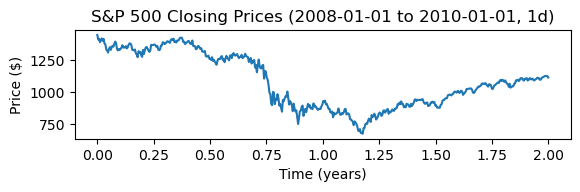

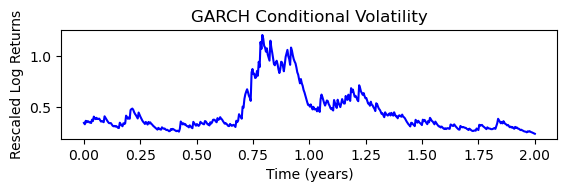

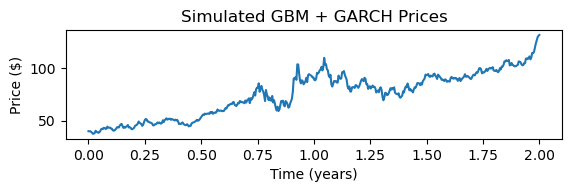

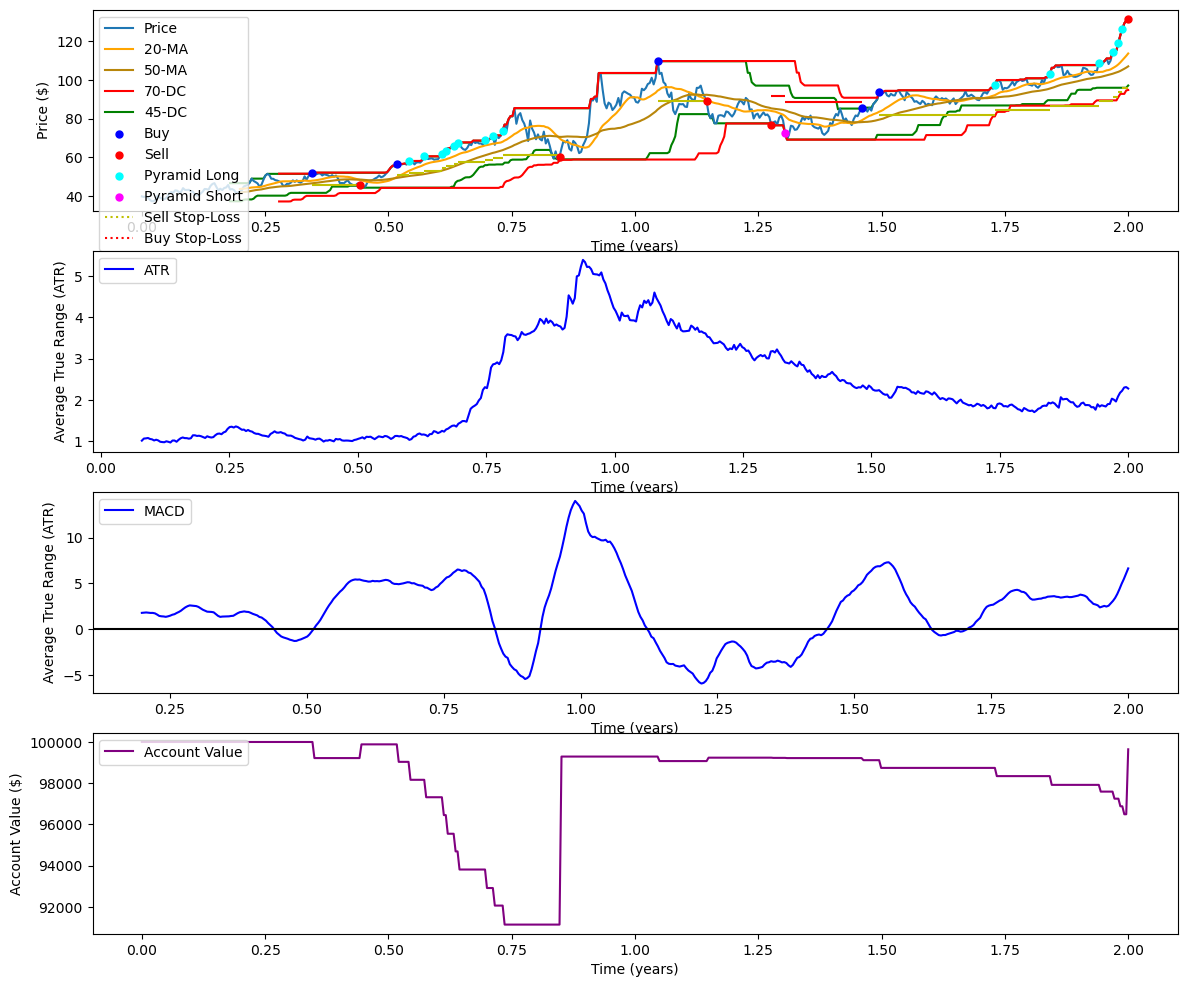

Return after 504 periods: -0.3553 %
Return/MaxDrawdown: -0.040086180620205296


In [30]:
# Set System 3 (GBM + GARCH) Parameters

# GARCH parameters
p = 1     
q = 1      
stock = '^GSPC'              
start = "2008-01-01"
end = "2010-01-01"
interval = "1d"
garch_params = [p, q, stock, start, end, interval]

# GBM Path parameters
mu = 0.5              
S0 = 40                     
prices_per_n = 4     
path_params = [mu, S0, prices_per_n]

# Strategy Parameters
initial_account_size = 100000  
entry_breakout_period = 70#70      
exit_breakout_period = 45#45
ma1_period = 20             # (ma1-ma2) > 0 when ma1 > ma2
ma2_period = 50 
exposure = 0.01                
big_point_value = 1             
slippage_period = 1           
trans_fee = 10            
strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, ma1_period, ma2_period, exposure, big_point_value, slippage_period, trans_fee]

# Instantiate and Run System 3 (GBM + GARCH) Simulation
sys3_garch = sim_sys3_garch()
sys3_garch.train_garch(garch_params)
sys3_garch.sim_stochastic(path_params)
sys3_garch.sim_strategy(strategy_params, debug=False)

print("Return after", len(sys3_garch.close), "periods:", np.round((sys3_garch.account_evolution[-1]/initial_account_size-1)*100,4), "%")
print("Return/MaxDrawdown:", (sys3_garch.account_evolution[-1]/initial_account_size-1) / (1-np.min(sys3_garch.account_evolution)/initial_account_size))

### IV. ii. Comparing System 2 and System 3 (GBM + GARCH prices)

In [31]:
# Generate random start and end dates, between 1 and 2 years apart, in the range of 1990 and 2023

# initialize storage arrays
sys2_dates = []
ex_sys2_dates = []
sys3_dates = []

P = 500    # Number of paths sampled

for i in range(P):
    start_date = datetime.strptime('1995-01-01', '%Y-%m-%d')
    end_date = datetime.strptime('2020-01-01', '%Y-%m-%d')

    # Generate random start date
    rnd_start_date = start_date + timedelta(
        seconds=random.randint(0, int((end_date - start_date).total_seconds())))
    rnd_start_date_str = rnd_start_date.strftime('%Y-%m-%d')
    
    # Generate a random end date, 1-2 years from the start date
    rnd_years = timedelta(days=random.randint(1,2)*365.25)
    rnd_end_date = rnd_start_date + rnd_years

  ## Adjust for burn-in time, and number of trading days in a year
    # System 2
    adj = rnd_end_date + timedelta(days=(55*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    sys2_dates.append((rnd_start_date_str, rnd_end_date_str))
    
    # Extended System 2
    adj = rnd_end_date + timedelta(days=(70*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    ex_sys2_dates.append((rnd_start_date_str, rnd_end_date_str))
       
    # System 3
    adj = rnd_end_date + timedelta(days=(70*(365/252)))
    rnd_end_date_str = adj.strftime('%Y-%m-%d')
    sys3_dates.append((rnd_start_date_str, rnd_end_date_str))

In [32]:
#  Monte Carlo 5: Comparing System 2 and System 3 (GBM + GARCH).

# Initialize storage arrays
sys2_garch_returns = np.array([])
sys2_garch_num_trans = np.array([])
sys2_garch_drawdown = np.array([])

ex_sys2_garch_returns = np.array([])
ex_sys2_garch_num_trans = np.array([])
ex_sys2_garch_drawdown = np.array([])

sys3_garch_returns = np.array([])
sys3_garch_num_trans = np.array([])
sys3_garch_drawdown = np.array([])

# Set constant parameters and counter
p = 1    
q = 1   
stock = '^GSPC'              
interval = "1d"
initial_account_size = 100000  
exposure = 0.01                   
big_point_value = 1               
slippage_period = 1              
trans_fee = 10
S0 = 100  
prices_per_n = 4
ma1_period = 20
ma2_period = 55
epsilon = 1e-6
counter = 0 

for j in range(P):
    
    # Path Parameters
    mu = np.random.rand()*2-1   
    
#---------------------System 2---------------------
    # Breakout periods
    entry_breakout_period = 55   
    exit_breakout_period = 20
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
   
    # System 2 (GBM + GARCH) returns
    sys2_garch = sim_sys2_garch()
    start = sys2_dates[j][0]
    end = sys2_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    sys2_garch.train_garch(garch_params)
    #S0 = sys2_garch.real_closes[0] 
    path_params = [mu, S0, prices_per_n]
    sys2_garch.sim_stochastic(path_params, plot=False)
    sys2_garch.sim_strategy(strategy_params, plot=False)
    returns = (sys2_garch.account_evolution[-1]/initial_account_size-1)*100
    sys2_garch_returns = np.append(sys2_garch_returns, returns)
    sys2_garch_num_trans = np.append(sys2_garch_num_trans, sys2_garch.num_trans)
    sys2_garch_drawdown = np.append(sys2_garch_drawdown, (sys2_garch.account_evolution[-1]/initial_account_size-1) / 
                                    (1-np.min(sys2_garch.account_evolution)/initial_account_size+epsilon))

#---------------------Extended System 2---------------------
    # Breakout periods
    entry_breakout_period = 70   
    exit_breakout_period = 45
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, exposure, big_point_value, slippage_period, trans_fee]
   
    # System 2 (GBM + GARCH) returns
    ex_sys2_garch = sim_sys2_garch()
    start = ex_sys2_dates[j][0]
    end = ex_sys2_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    ex_sys2_garch.train_garch(garch_params)
    path_params = [mu, S0, prices_per_n]
    ex_sys2_garch.sim_stochastic(path_params, plot=False)
    ex_sys2_garch.sim_strategy(strategy_params, plot=False)
    returns = (ex_sys2_garch.account_evolution[-1]/initial_account_size-1)*100
    ex_sys2_garch_returns = np.append(ex_sys2_garch_returns, returns)
    ex_sys2_garch_num_trans = np.append(ex_sys2_garch_num_trans, ex_sys2_garch.num_trans)
    ex_sys2_garch_drawdown = np.append(ex_sys2_garch_drawdown, (ex_sys2_garch.account_evolution[-1]/initial_account_size-1) / 
                                       (1-np.min(ex_sys2_garch.account_evolution)/initial_account_size+epsilon))

#---------------------System 3---------------------
    # Breakout periods
    entry_breakout_period = 70   
    exit_breakout_period = 45
    strategy_params = [initial_account_size, entry_breakout_period, exit_breakout_period, ma1_period, ma2_period, exposure, big_point_value, slippage_period, trans_fee]
   
    # System 3 (GBM + GARCH) returns
    sys3_garch = sim_sys3_garch()
    start = sys3_dates[j][0]
    end = sys3_dates[j][1]
    garch_params = [p, q, stock, start, end, interval]
    sys3_garch.train_garch(garch_params)
    path_params = [mu, S0, prices_per_n]
    sys3_garch.sim_stochastic(path_params, plot=False)
    sys3_garch.sim_strategy(strategy_params, plot=False)
    returns = (sys3_garch.account_evolution[-1]/initial_account_size-1)*100
    sys3_garch_returns = np.append(sys3_garch_returns, returns)
    sys3_garch_num_trans = np.append(sys3_garch_num_trans, sys3_garch.num_trans)
    sys3_garch_drawdown = np.append(sys3_garch_drawdown, (sys3_garch.account_evolution[-1]/initial_account_size-1) / 
                                    (1-np.min(sys3_garch.account_evolution)/initial_account_size+epsilon))

    counter += 1
    print('\rIteration number: {}'.format(counter), end="")

Iteration number: 36

C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration number: 171

C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration number: 180

C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration number: 375

C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\icon8\anaconda3\envs\pfe\lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration number: 500

In [33]:
# Remove extreme outliers
filtered_bin = []
for r in [sys2_garch_returns, ex_sys2_garch_returns, sys3_garch_returns, sys2_garch_drawdown, ex_sys2_garch_drawdown, sys3_garch_drawdown]:
    lower, upper = np.percentile(r, [1,99])
    filtered = r[(r > lower) & (r < upper)]
    filtered_bin.append(filtered)
sys2_garch_returns, ex_sys2_garch_returns, sys3_garch_returns, sys2_garch_drawdown, ex_sys2_garch_drawdown, sys3_garch_drawdown = filtered_bin

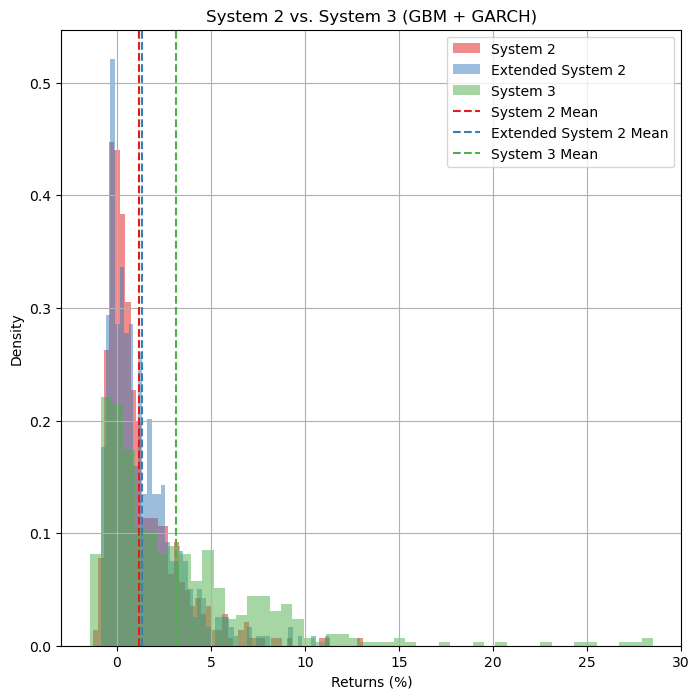

------------- SYSTEM 2 (GARCH) -------------
System 2 Mean: 1.1914621541284947
System 2 Avg. # of Transactions: 6.388
System 2 Avg. Return/MaxDrawdown: 9.901460595595918

------------- EXTENDED SYSTEM 2 (GARCH)-------------
Extended System 2 Mean: 1.30618489249605
Extended System 2 Avg. # of Transactions: 4.624
Extended System 2 Avg. Return/MaxDrawdown: 8.611067736336894

------------- SYSTEM 3 (GARCH) -------------
System 3 Mean: 3.15203362814518
System 3 Avg. # of Transactions: 2.718
System 3 Avg. Return/MaxDrawdown: 11.976749706988683


In [34]:
# Plot the results

plt.figure(figsize=(8,8))
plt.subplot(1,1,1)
plt.hist(sys2_garch_returns, alpha=0.5, bins=50, label='System 2', color="#e41a1c", density=True)
plt.hist(ex_sys2_garch_returns, alpha=0.5, bins=50, label='Extended System 2', color="#377eb8", density=True)
plt.hist(sys3_garch_returns, alpha=0.5, bins=50, label='System 3', color="#4daf4a", density=True)
plt.axvline(np.mean(sys2_garch_returns), color="#e41a1c", linestyle="--", label="System 2 Mean")
plt.axvline(np.mean(ex_sys2_garch_returns), color="#377eb8", linestyle="--", label="Extended System 2 Mean")
plt.axvline(np.mean(sys3_garch_returns), color="#4daf4a", linestyle="--", label="System 3 Mean")
plt.xlabel('Returns (%)')
plt.ylabel('Density')
plt.title("System 2 vs. System 3 (GBM + GARCH)")
plt.legend()
plt.grid(True)

plt.show()

print("------------- SYSTEM 2 (GARCH) -------------")
print("System 2 Mean:", np.mean(sys2_garch_returns))
print("System 2 Avg. # of Transactions:", np.mean(sys2_garch_num_trans))
print("System 2 Avg. Return/MaxDrawdown:",  np.nanmean(sys2_garch_drawdown))   
print()
print("------------- EXTENDED SYSTEM 2 (GARCH)-------------")
print("Extended System 2 Mean:", np.mean(ex_sys2_garch_returns))
print("Extended System 2 Avg. # of Transactions:", np.mean(ex_sys2_garch_num_trans))
print("Extended System 2 Avg. Return/MaxDrawdown:",  np.nanmean(ex_sys2_garch_drawdown)) 
print()
print("------------- SYSTEM 3 (GARCH) -------------")
print("System 3 Mean:", np.mean(sys3_garch_returns))
print("System 3 Avg. # of Transactions:", np.mean(sys3_garch_num_trans))
print("System 3 Avg. Return/MaxDrawdown:", np.nanmean(sys3_garch_drawdown))

## V. Conclusion

_As Richard Dennis' Turtle Experiment was drawing to an end, a group of four Turtles dedicated a year to crafting a systems-testing platform to pick apart the strategy upon which they had staked their fortunes. In their simulations, they discovered that the system was assuming excessively high risk relative to the rewards it could reap from trend-following. Acting promptly on this insight, Dennis reduced the Turtles' leverage by 50%.$^{10}$_

In this project, we have developed a computational framework for simulating and stress-testing the Turtle Trading System in order to better understand the fundamental drivers of its behaviors and performance across a diverse set of market conditions. We began by implementing the system on synthetic prices modeled by Geometric Brownian Motion (GBM) with constant relative volatility. Here, we investigated the susceptibility of the Turtle Trading System to small price movements, especially during periods of rangebound prices, and found that extending the Donchian channels made both systems more resistant to such signals. We also discovered that the system's risk-adjusted position sizing rule, depending inversely on measures of absolute volatility, can quickly expand when prices converge to the zero-bound in exponential decay, resulting in greater variance of returns and heightened risk. After exploring the asymmetric and interactive effects of GBM drift and volatility on average return, we introduced dynamic volatilities from a GARCH model to explore the role of conditional heteroskedasticity and volatility clustering in the performance of the system. Generally, time-varying conditional volatility had a positive effect for systems with short Donchian channels and a negative effect for systems with longer Donchian channels, although the latter's absolute average returns remained higher. 

Throughout the project, we conducted several Monte Carlo simulations to improve our understanding of the influence of various strategies and parameters of the Turtle Trading System, and modified them to increase its Return/MaxDrawdown. The Turtle Trading System faces high hurdles for practical use in a modern trading portfolio, but we believe that there are many potential avenues for improving the risk-reward profile of the trading strategy in GBM + GARCH price environments. In this regard, we are particularly interested in exploring the addition of cluster-identification and volatility-reversion strategies for price paths with strong volatility clustering. 

### Works Cited

1. “Original Turtle Rules.” OriginalTurtles.Org, www.tradingwithrayner.com/wp-content/uploads/2014/11/OriginalTurtleRules.pdf. Accessed 8 July 2023. 
2. “Average True Range.” Wikipedia, 5 Mar. 2023, en.wikipedia.org/wiki/Average_true_range. 
3. Raposa. “Testing Turtle Trading: The System That Made Newbie Traders Millions.” Raposa, 18 Aug. 2021, raposa.trade/blog/testing-turtle-trading-the-system-that-made-newbie-traders-millions/. 
4. “Turtle Trading System.” Wisdom Trading, 3 Feb. 2023, www.wisdomtrading.com/public-trading-systems/turtle-trading-system/. 
5. Lempérière, Yves, et al. “Two Centuries of Trend Following.” The Journal of Investment Strategies, vol. 3, no. 3, 2014, pp. 41–61, https://doi.org/10.21314/jois.2014.043. 
6. “Geometric Brownian Motion.” Wikipedia, 22 June 2023, en.wikipedia.org/wiki/Geometric_Brownian_motion. 
7. “Autoregressive Conditional Heteroskedasticity.” Wikipedia, 26 Feb. 2023, en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity. 
8. “Topics in Mathematics with Applications in Finance: Mathematics.” MIT OpenCourseWare, ocw.mit.edu/courses/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/. Accessed 8 July 2023. 
9. Tuning up the Turtle - Tradingwithrayner, tradingwithrayner.com/wp-content/uploads/2014/11/turtle-strategy-revised.pdf. Accessed 8 July 2023. 
10. “About Turtletrader®.” The Original TurtleTrader, www.turtletrader.com/about/. Accessed 8 July 2023. 